# Avacado Project

Avocado is a fruit consumed by people heavily in the United States. In this dataset we have 18249 rows and 14 columns including both dependent and indpendent variables. The goal is to predict the average price which is continuous in nature of the different type of avocado and using the region that in which region they are lying. Since the target variable is is continuous in nature will use Regresson models to predict the price of the fruit.

The following are the relevant columns in the dataset

Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold

Inspiration /Label

1.We need to make a model that can consider the data provided and predict the Average Price using regression.

2. WE need to make a model that can consider the dta and predict the region using classification

# 1. Average Price using regression

# Importing necessary libraries


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
import scipy as stats
%matplotlib inline
warnings.filterwarnings('ignore')


# Importing dataset


In [51]:
# Reading the csv file from dataset
df = pd.read_csv('avocado.csv')
df


Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0       48.16     8696.87     8603.62       93.25          0.0  conventional   
1       58.33     9505.56     9408.07       97.49          0.0  conventional   
2      130.50     8145.35     8042.21      103.14          0.0  conventional   
3       72.58     5811.16     5677.40      133.76          0.0  conventional   
4       75.78     6183.95     5986.26      197.69          0.0  conventional   
...       ...         ...         ...         ...          ...           ...   
18244    0.00    13498.67    13066.82      431.85          0.0       organic   
18245    0.00     9264.84     8940.04      324.80          0.0       organic   
18246  727.94     9394.11     9351.80       42.31          0.0       organic   
18247  727.01    10969.54    10919.54       50.00          0.0       organic   
18248  224.53    12014.15    11988.14       26.01          0.0       organic   

       year            region  
0      2015            Albany  
1      2015            Albany  
2      2015            Albany  
3      2015            Albany  
4      2015            Albany  
...     ...               ...  
18244  2018  WestTexNewMexico  
18245  2018  WestTexNewMexico  
18246  2018  WestTexNewMexico  
18247  2018  WestTexNewMexico  
18248  2018  WestTexNewMexico  

[18249 rows x 14 columns]

H From the dataset we can notice there are 14 columns which contains both features and one target variable. Here "Average Price" is the target variable which contains continuous data so it is a regression type problem. The dataset contains both numerical and categorical columns.

As seen in the dataset the column Unnamed is taken on the basis of index purpose which does not play any important role in the price prediction of avocado, so I am dropping this column.



In [52]:
# Dropping the irrelevant column Unnamed:0
df.drop("Unnamed: 0",axis=1, inplace=True)


here we have dropped a column unnamed

In [53]:
df.head()


Date  AveragePrice  Total Volume     4046       4225    4770  \
0  2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1  2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2  2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3  2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4  2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  2015  Albany  
3     5811.16     5677.40      133.76          0.0  conventional  2015  Albany  
4     6183.95     5986.26      197.69          0.0  conventional  2015  Albany

Dispaying the first 5 rows of dataset

# Exploratory Data Analysis (EDA)


In [35]:
# Checking the dimension of the dataset
df.shape


(18249, 13)

There are 18249 rows and 13 columns are there in the dataset.



In [6]:
# Checking the types of the dataset
df.dtypes


Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

 The columns in the dataset contains three different types of data namely float, integer and object data type. There are 3 columns having object data type that are categorical in nature which we need to process separately by using encoding methods.

The Date column showing object data type which means python is not able to understand the type of Date. So let's do feature engineering to split Date into Month and Day. Since year column is already been there so no need to separate it.

Feature engineering


In [54]:
# Changing date column from object type to Date Type
df['Date']=pd.to_datetime(df['Date'])


In [5]:
# Checking the type of data again
df.dtypes


Unnamed: 0               int64
Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

We can see the Date column has datetime data type. Now let's split this data into months and day.



In [55]:
df["Month"] = df["Date"].dt.month


In [56]:
df["Day"] = df["Date"].dt.day


Now we have separated Month and Day from Date column and now the column Date is of no use, so let's drop it.



In [57]:
df.drop("Date",axis=1,inplace=True)


In [58]:
df.head()


AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags          type  year  region  Month  Day  
0     8603.62       93.25          0.0  conventional  2015  Albany     12   27  
1     9408.07       97.49          0.0  conventional  2015  Albany     12   20  
2     8042.21      103.14          0.0  conventional  2015  Albany     12   13  
3     5677.40      133.76          0.0  conventional  2015  Albany     12    6  
4     5986.26      197.69          0.0  conventional  2015  Albany     11   29

In [59]:
# Again check the shape of the dataset
df.shape


(18249, 14)

There are 18249 rows and 14 columns. Here we have added two more columns from date.



In [10]:
# To get good overview of the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
 13  Month         18249 non-null  int64  
 14  Day           18249 non-null  int64  
dtypes: float64(9), int64(4), object(2)
memory usage: 2.1+ MB


This gives the brief information about the dataset which includes indexing type, column type, no-null values and memory usage.



In [11]:
# Checking number of unique values in each column
df.nunique()

Unnamed: 0         53
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
Month              12
Day                31
dtype: int64

These are the number of unique values present in each columns.



In [12]:
# Checking null values in the dataset
df.isnull().sum()


Unnamed: 0      0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Month           0
Day             0
dtype: int64

It is clear that there are no null values present in the dataset.



<AxesSubplot:>

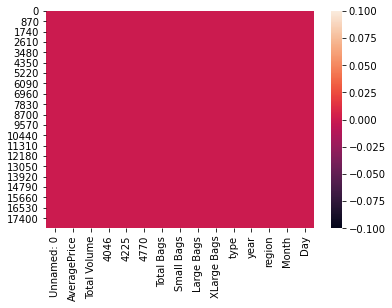

In [13]:
# Let's visualize the null values clearly
sns.heatmap(df.isnull())


By visualizing also we can say there are no missing values. So our data is cleaned. Let's move further.



In [14]:
# Checking how many columns are there in the dataset
df.columns


Index(['Unnamed: 0', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region', 'Month', 'Day'],
      dtype='object')

These are the columns present in dataset.

In [15]:
# Checking the uniqueness of target variable
df['AveragePrice'].unique()


array([1.33, 1.35, 0.93, 1.08, 1.28, 1.26, 0.99, 0.98, 1.02, 1.07, 1.12,
       1.31, 1.11, 1.34, 1.45, 1.05, 1.37, 1.27, 1.32, 1.23, 1.19, 1.43,
       1.2 , 1.22, 1.13, 1.16, 1.06, 1.17, 1.24, 0.96, 1.  , 1.09, 0.95,
       0.97, 1.15, 1.01, 1.14, 1.1 , 1.04, 1.03, 1.18, 1.29, 1.25, 0.71,
       0.94, 0.91, 1.39, 1.4 , 1.36, 1.3 , 1.54, 1.59, 1.56, 1.38, 1.49,
       1.5 , 1.47, 1.42, 1.41, 1.44, 1.52, 0.9 , 0.87, 0.78, 0.92, 0.83,
       0.88, 0.84, 0.85, 1.21, 0.79, 0.89, 0.86, 0.8 , 0.82, 0.74, 0.81,
       0.77, 0.75, 0.65, 0.73, 0.68, 0.72, 0.67, 0.76, 0.62, 0.7 , 0.66,
       1.46, 0.49, 0.53, 0.56, 0.6 , 0.58, 0.54, 0.52, 0.51, 0.57, 0.63,
       0.64, 0.61, 1.48, 1.55, 1.58, 1.53, 1.57, 1.51, 0.69, 1.62, 1.63,
       1.61, 1.6 , 1.73, 1.8 , 1.86, 1.85, 1.69, 1.66, 1.65, 1.64, 1.67,
       1.68, 1.82, 2.07, 1.84, 1.83, 1.7 , 1.72, 1.81, 1.78, 0.59, 1.9 ,
       1.93, 1.99, 1.95, 1.89, 1.76, 1.71, 1.74, 0.55, 1.79, 1.75, 1.94,
       2.2 , 1.87, 1.77, 2.06, 2.11, 2.22, 2.14, 2.

These are the unique values present in the target variable.



In [16]:
# List of values in the target variable
df["AveragePrice"].value_counts()


1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.05      1
3.03      1
2.91      1
0.48      1
2.96      1
Name: AveragePrice, Length: 259, dtype: int64

This gives the list of values in the target variable which has int64 data type.



In [17]:
# Checking wheather the dataset contains any space
df.loc[df['AveragePrice']==" "]


Empty DataFrame
Columns: [Unnamed: 0, AveragePrice, Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags, type, year, region, Month, Day]
Index: []

So from the above observation we can say there are no spaces present in the dataset.



# Description of Dataset


In [18]:
# Statistical summary of dataset
df.describe()


Unnamed: 0  AveragePrice  Total Volume          4046          4225  \
count  18249.000000  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04   
mean      24.232232      1.405978  8.506440e+05  2.930084e+05  2.951546e+05   
std       15.481045      0.402677  3.453545e+06  1.264989e+06  1.204120e+06   
min        0.000000      0.440000  8.456000e+01  0.000000e+00  0.000000e+00   
25%       10.000000      1.100000  1.083858e+04  8.540700e+02  3.008780e+03   
50%       24.000000      1.370000  1.073768e+05  8.645300e+03  2.906102e+04   
75%       38.000000      1.660000  4.329623e+05  1.110202e+05  1.502069e+05   
max       52.000000      3.250000  6.250565e+07  2.274362e+07  2.047057e+07   

               4770    Total Bags    Small Bags    Large Bags    XLarge Bags  \
count  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000   
mean   2.283974e+04  2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   
std    1.074641e+05  9.862424e+05  7.461785e+05  2.439660e+05   17692.894652   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00       0.000000   
25%    0.000000e+00  5.088640e+03  2.849420e+03  1.274700e+02       0.000000   
50%    1.849900e+02  3.974383e+04  2.636282e+04  2.647710e+03       0.000000   
75%    6.243420e+03  1.107834e+05  8.333767e+04  2.202925e+04     132.500000   
max    2.546439e+06  1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   

               year         Month           Day  
count  18249.000000  18249.000000  18249.000000  
mean    2016.147899      6.177215     15.662612  
std        0.939938      3.534130      8.776281  
min     2015.000000      1.000000      1.000000  
25%     2015.000000      3.000000      8.000000  
50%     2016.000000      6.000000     16.000000  
75%     2017.000000      9.000000     23.000000  
max     2018.000000     12.000000     31.000000

This gives the statistical information of the dataset. The summary of this dataset looks perfect since there is no negative/ invalid values present.

From the above description we can observe the following things.

The counts of all the columns are same which means there are no null values present in the daaset.

The label Average Price has mean which is bit greater than median, means it is skewed to right. The minimum price of the single fruit avocado is 0.44 dollars(say), max is 3.25 and mean is 1.04.

The mean and the median(50%) are very close to each other in most of the columns like 4225(Total number of avocados with PLU 4225), year, Month, Day which means the data is symmetrical (normal) in these columns.

The mean is greater than the median in most of the columns which means they are skewed to right.

In some of the columns median is greater than the mean, hence they are skewed to left.

Most of the columns have nearly zero statistics also the mean and the standard deviation are very close to each other.

By looking at the difference between max and 75% (3rd quantile), we can infer there are outliers present in most of the column. We will remove this outliers in further steps.





Before visualizing the data let's separate the categorical and numerical columns.



In [60]:
# checking for categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)


['type', 'region']


These are the categorical columns that we have, will encode these columns using either label encoder or one hot encoder.



In [61]:
# Now checking for numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)


['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'Month', 'Day']


These are the numerical columns present in the dataset.



# Data Visualization


# Univariate Analysis


conventional    9126
organic         9123
Name: type, dtype: int64


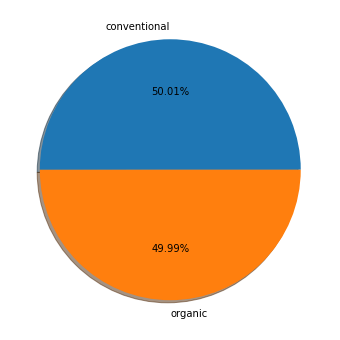

In [21]:
#Visualize the count of type of the avocado
print(df["type"].value_counts())
labels='conventional','organic'
fig, ax = plt.subplots(figsize=(10,6))
ax.pie(df['type'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()


We can observe both conventional and organic types of avocado are equal in counts. Which means half of the avocado products involves chemicals. Both types have equal demand.



2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64


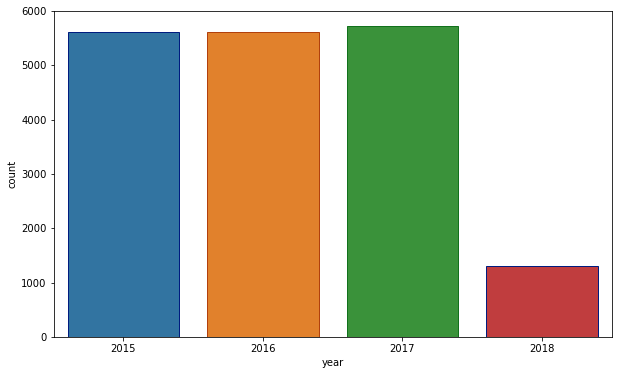

In [22]:
#Visualize the count of year
print(df["year"].value_counts())
plt.figure(figsize=(10,6))

sns.countplot(df["year"],edgecolor=sns.color_palette("dark", 3))
plt.show()


The count of 2017 is bit higher than 2016 and 2015, 2018 has very less count, whch means the price and the sales of avocado is less in this year



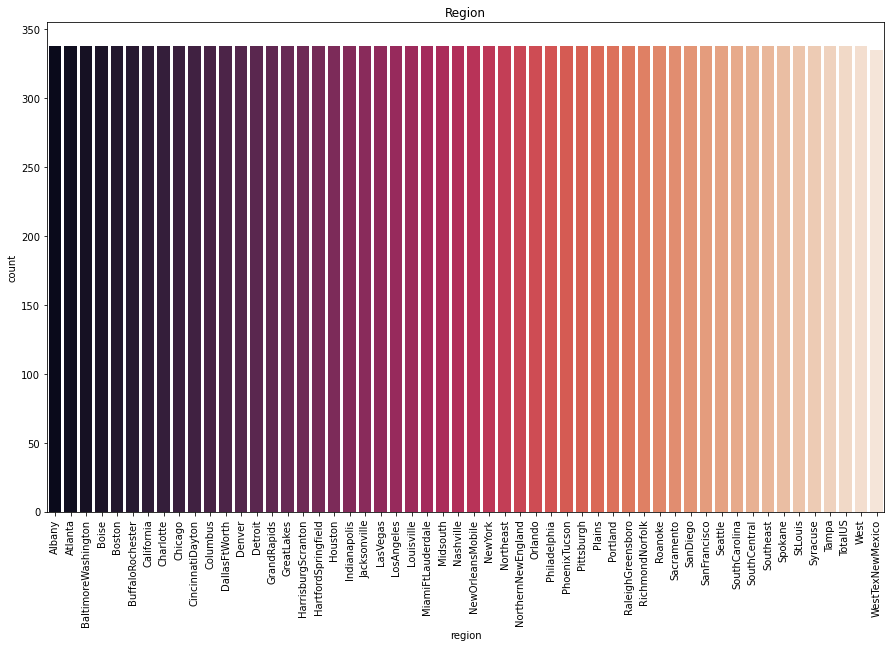

In [23]:
#Visualize the count of year
plt.figure(figsize=(15,9))
sns.countplot(df["region"],palette="rocket")
plt.title("Region")
plt.xticks(rotation=90)
plt.show()


We can observe the count of avocado is almost same in all the regions, all of them have the count 338 but WestTexNewMexico has count 335 which is bit less than others.

Let's plot the distribution plot to know how the data has been distributed in all the columns.



# Distribution of skewness


1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.05      1
3.03      1
2.91      1
0.48      1
2.96      1
Name: AveragePrice, Length: 259, dtype: int64


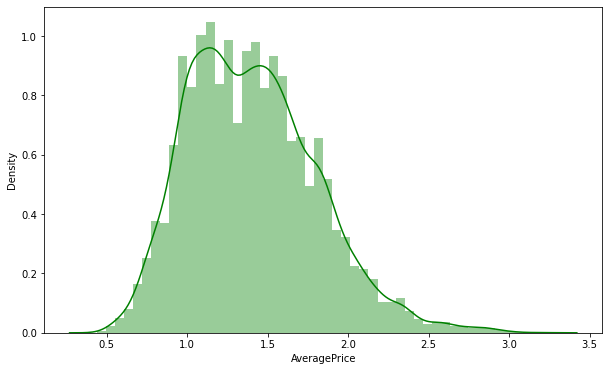

In [42]:
# Distribution plot for target variable "AveragePrice"
print(df["AveragePrice"].value_counts())
plt.figure(figsize=(10,6))
sns.distplot(df["AveragePrice"], color="g")
plt.show()


Here we can infer that the data is normally distributed in the label. Also the price of the avocado is more between 1.15 - 1.5.



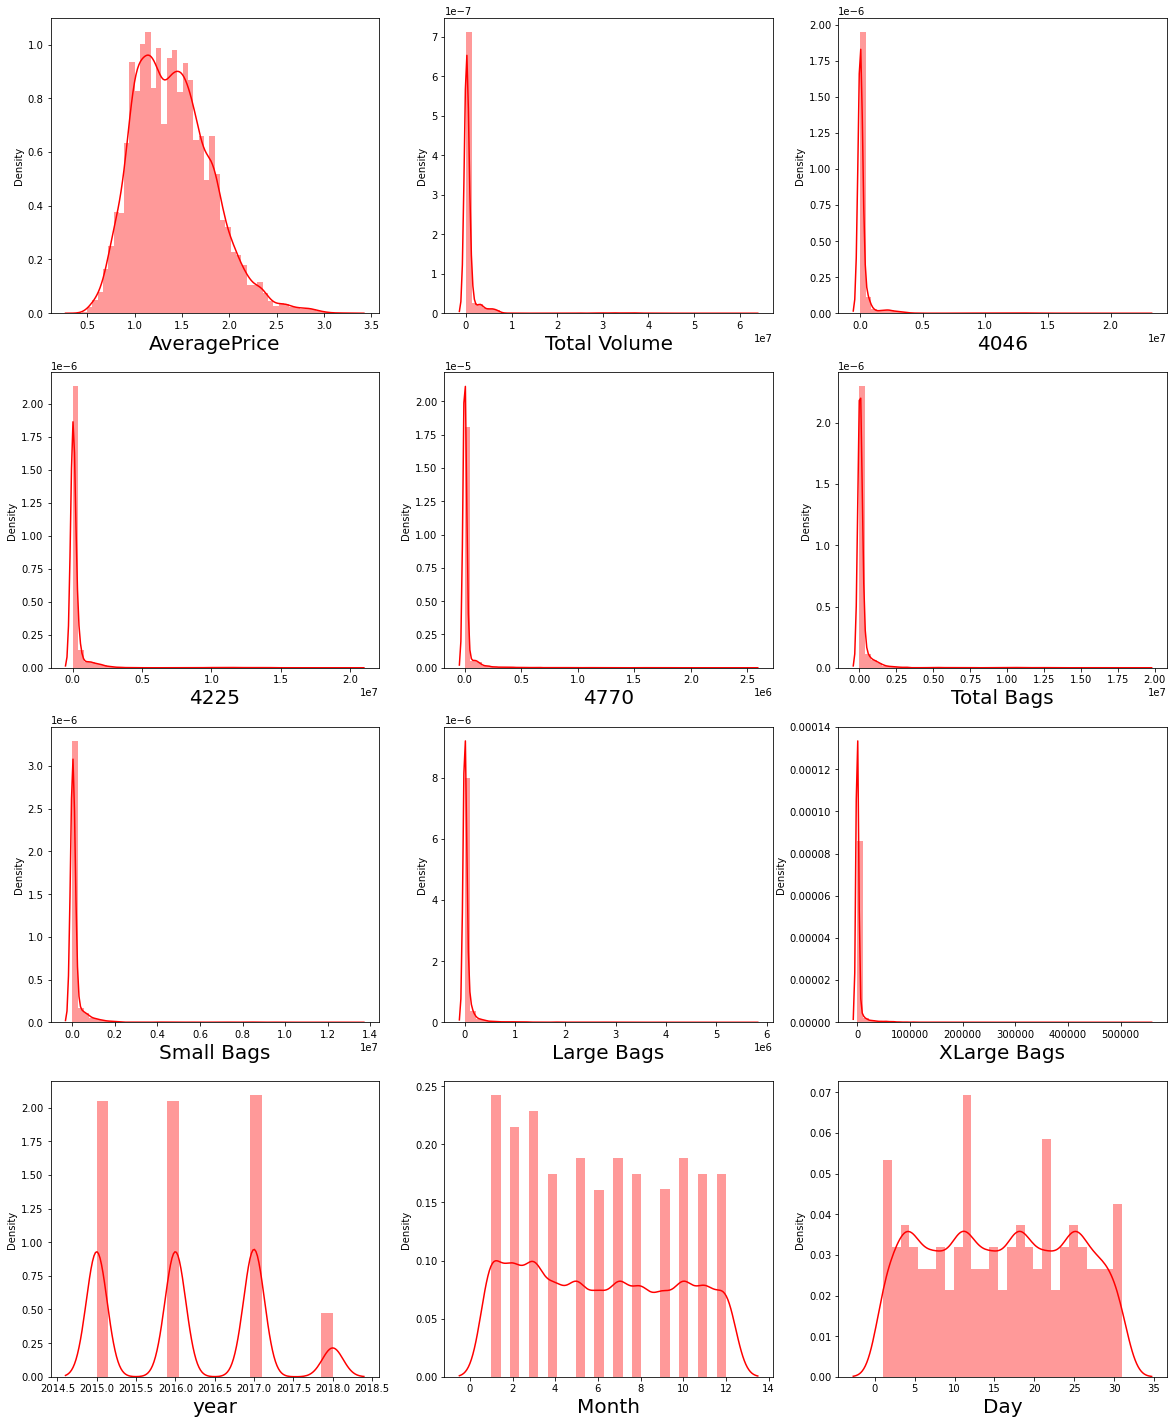

In [43]:
# Checking how the data has been distriubted in each column

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numerical_col:
    if plotnumber<=14:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(df[column],color='r')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()


From the above distplots we can observe that none of the columns are normally distributed but AveragePrice.

Also the columns contains huge skewness most of them are skewed to left, which means median is more than the mean in these columns. 


# Bivariate Analysis


# Comparision between year and AveragePrice

Text(0, 0.5, 'AveragePrice')

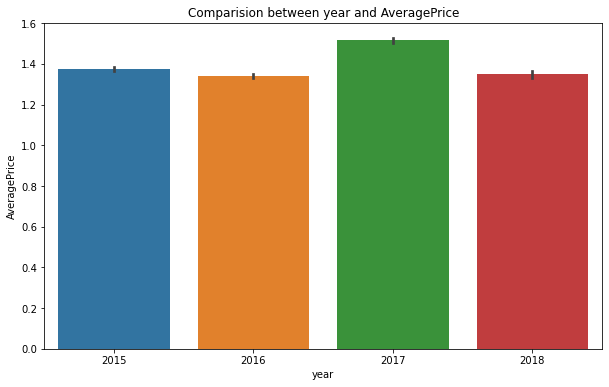

In [44]:
# Checking which year has maximum AveragePrice
plt.figure(figsize=[10,6])
plt.title('Comparision between year and AveragePrice')
sns.barplot(df['year'],df['AveragePrice'], data=df);
plt.xlabel("year")
plt.ylabel("AveragePrice")


The barplot shows that the AveragePrice is maximum in the year 2017 followed by 2015.



# Relationship between Average Price and Month

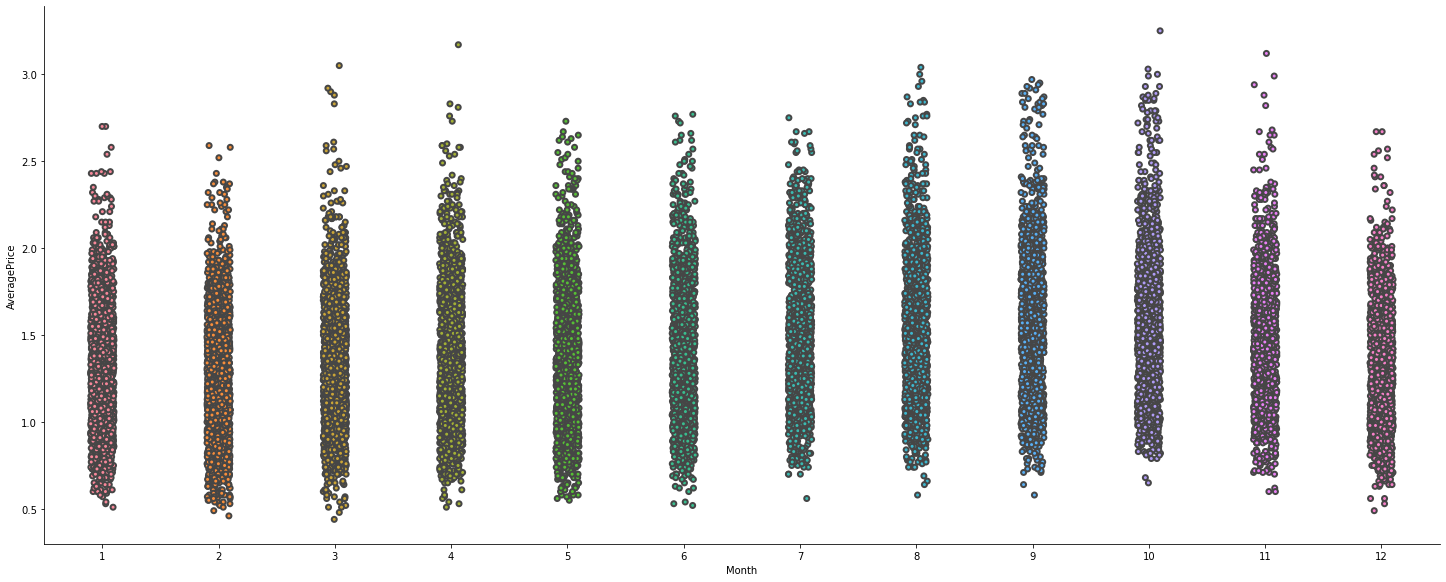

In [45]:
sns.catplot(x = "Month", y = "AveragePrice", kind="strip",data=df,height=8, linewidth=2, aspect=2.5)


Looking at the plot we can observe the Average Price remains high during August(8th month), September(9th month) and October and starts to drop from November onwards. Also the price of avocado is less in the months may to july and again there is an increment of price of avocado in the month April and March.



# Relationship between year and Total volume

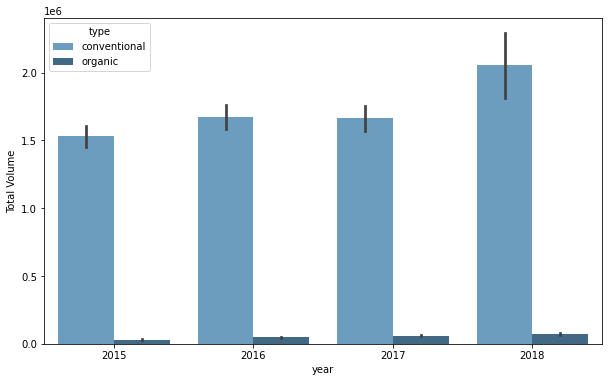

In [46]:
plt.figure(figsize=(10,6))
sns.barplot(x='year',y='Total Volume',hue="type",data=df,palette="Blues_d",ci=68)
plt.show()


Conventional types were sold higher every year with low price than Organic types which means the demand for conventional is high. Also The Total sales volume is spotted highest in the year 2018 and then declined in 2015. The total sales are same in the year 2016 and 2017.



# Relationship between Month and Average Price

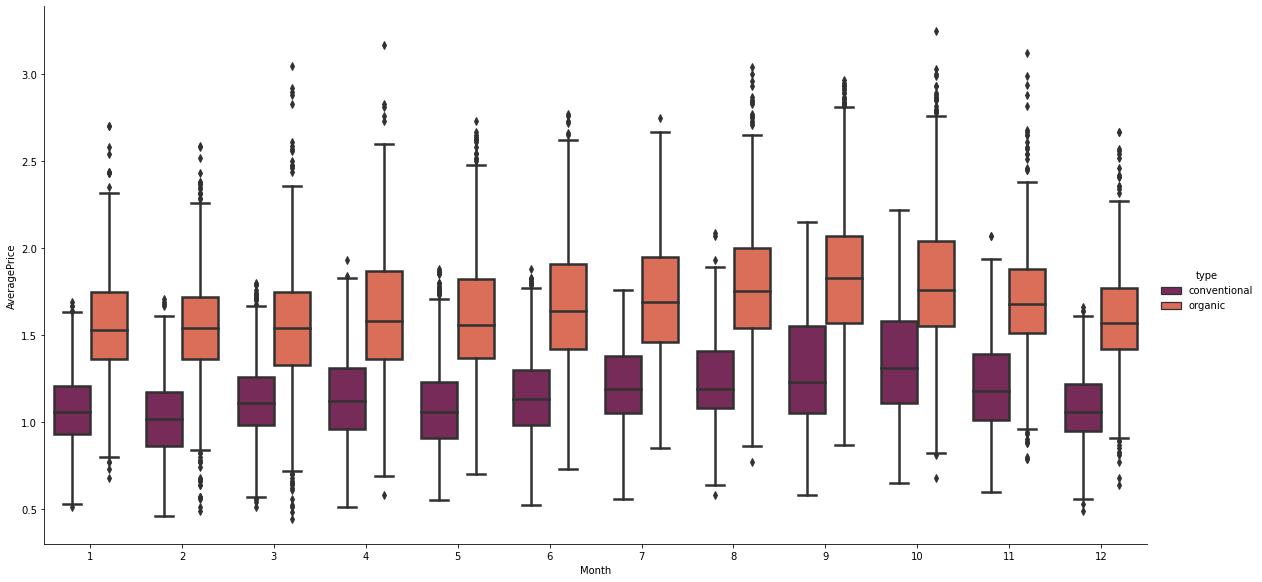

In [47]:
sns.catplot(x="Month", y="AveragePrice", hue="type", 
            kind="box", data=df, height=8, linewidth=2.5, aspect=2,palette="rocket");


Here we can notice that the AveragePrice of organic avocado fruit is more than the conventional type. As we can observe the AveragePrice of both type of avocados is high in the months August, September and October and it pulled down in November. Also the price is high in April and March.



# Relationship between Total volume and Avarage Price

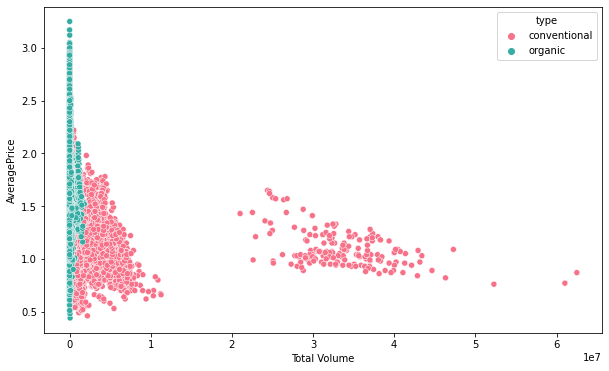

In [48]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Total Volume",y="AveragePrice",hue="type",data=df,palette="husl")
plt.show()


The scatter plot gives the relationship between the total volume and average price on the basis of type. All organic type of avocado is lies in the volume zero and the average price is high for organic. The conventional type avocado has total volume 0-4 with the Average price upto 2.3. So the Average Price of the oraganic type with zero volume is more than the conventional type.



# Comparision between PLU sold vs Day

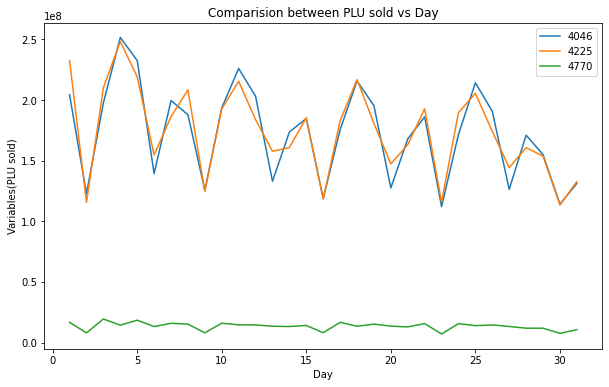

In [49]:
variables = df[['4046', '4225', '4770']].groupby(df.Day).sum()
variables.plot(kind='line', fontsize=10,figsize=(10,6))
plt.title("Comparision between PLU sold vs Day")
plt.xlabel("Day")
plt.ylabel("Variables(PLU sold)")
plt.show()


From the line plot we can observe how the total number of avocados with PLU 4046, PLU 4225 and PLU 4770 are sold in each day starting from day 1 to day 31. We can notice very few avocados with 4046 was sold in all the day and the avocados with PLU 4225 and PLU 4770 was sold all time high.



# Comparision between type of bags sold vs year

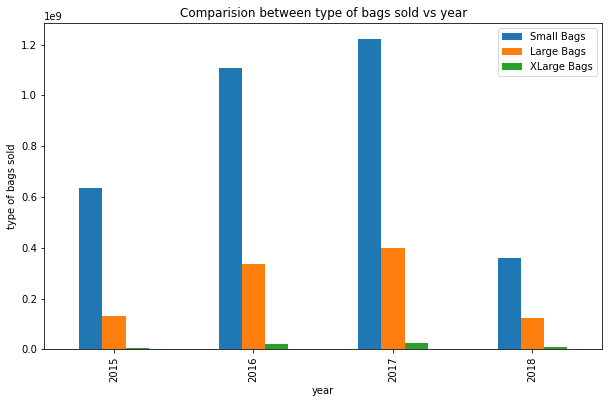

In [50]:
feature = df[["Small Bags","Large Bags","XLarge Bags"]].groupby(df.year).sum()
feature.plot(kind='bar', fontsize=10,figsize=(10,6))
plt.title("Comparision between type of bags sold vs year")
plt.xlabel("year")
plt.ylabel("type of bags sold")
plt.show()


Small bag size was sold all time highest where Xlarge Bag size was least sold.



# Average Price in each region with year

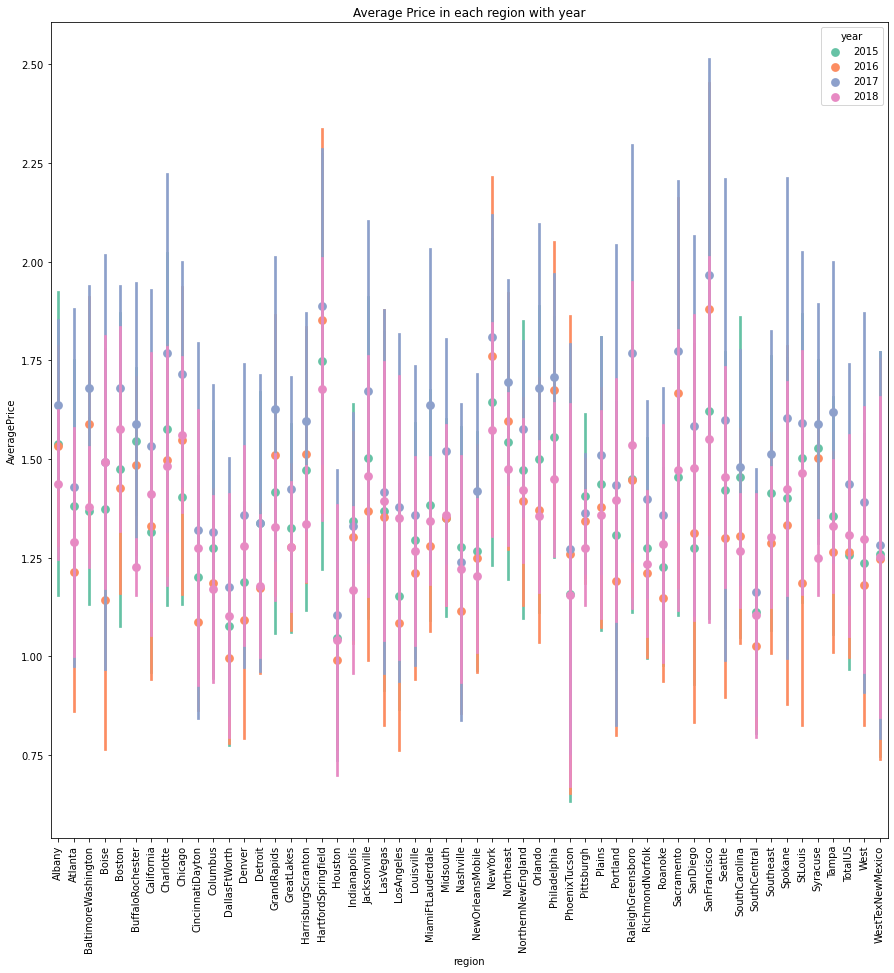

In [51]:
plt.figure(figsize=(15,15))
plt.title("Average Price in each region with year")
sns.pointplot(x='region',y='AveragePrice',data=df, hue='year',join=False,palette="Set2",ci="sd")
plt.xticks(rotation=90)
plt.show()


The average price of the avocado is high in the region SanFrancisco followed by RaleighGreensboro in the year 2017. The demand of the fruit is high in the year 2017 and less in the year 2018.



# Comparision between Day and AveragePrice

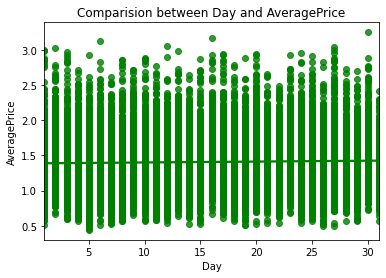

In [53]:
# plt.figure(figsize=[10,6])
plt.title('Comparision between Day and AveragePrice')
sns.regplot(df['Day'],df['AveragePrice'],color="g");
plt.show()


The average price of the avocado is high in almost all the days and less in 7th, 14th and 22nd day of the month.



# Comparision between type of bags sold vs year

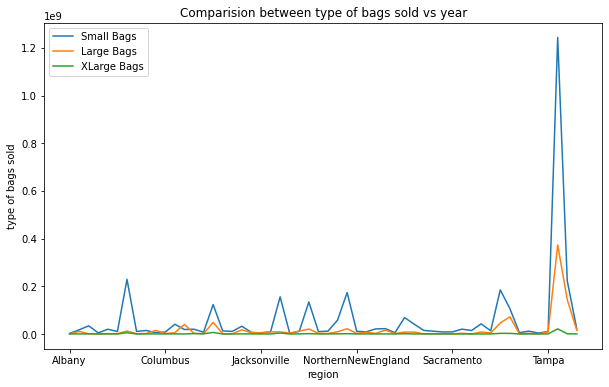

In [54]:
feature = df[["Small Bags","Large Bags","XLarge Bags"]].groupby(df.region).sum()
feature.plot(kind='line', fontsize=10,figsize=(10,6))
plt.title("Comparision between type of bags sold vs year")
plt.xlabel("region")
plt.ylabel("type of bags sold")
plt.show()


Small bags size sold high in the region Tampa. The price of Small bag size is also high in this region followed by Large Bags Size and Xlarge Bags size was sold least.



# Comparision between Total Bags and Total Volume

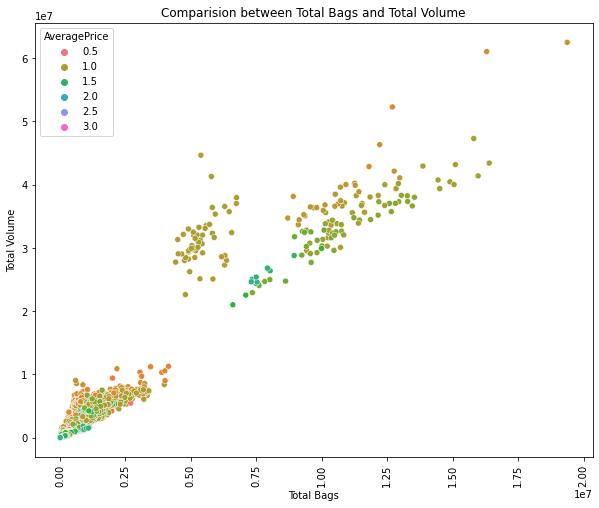

In [55]:
plt.figure(figsize=(10,8))
plt.title("Comparision between Total Bags and Total Volume")
sns.scatterplot(x='Total Bags',y='Total Volume',hue="AveragePrice",data=df,palette="husl")
plt.xticks(rotation=90)
plt.show()


There is a linear relationship between the features. As the total bags sales increases with total volume, the average price of the avocado also increases.



# Comparision between Small Bags sold vs AveragePrice

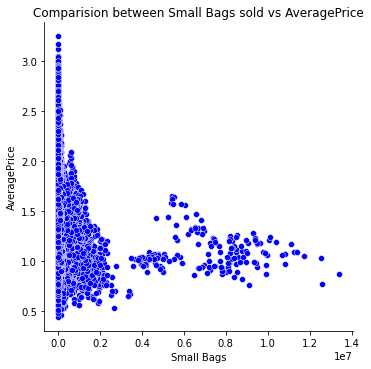

In [56]:
sns.relplot(df['Small Bags'],df['AveragePrice'],color="b");
plt.title("Comparision between Small Bags sold vs AveragePrice")
plt.xlabel("Small Bags")
plt.ylabel("AveragePrice")
plt.show()


The Small Bags size has high average price at first and also from the range 0-0.6, the price of small bag type is almost 1.6.



# Comparision between the PLU 4046 and PLU 4225

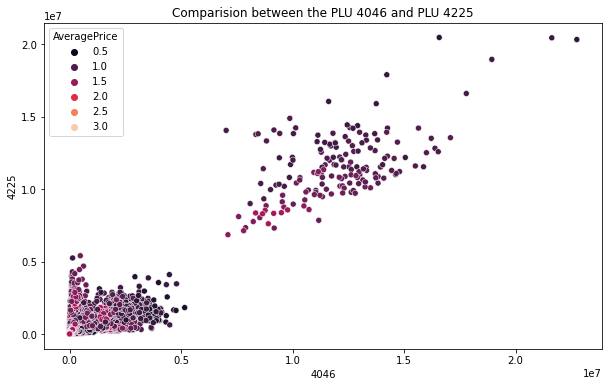

In [57]:
plt.figure(figsize=(10,6))
plt.title("Comparision between the PLU 4046 and PLU 4225")
sns.scatterplot(df["4046"],df["4225"],hue=df["AveragePrice"],palette="rocket")
plt.show()


There is a linear relationship between the total number of avocados with PLU 4046 and PLU 4225 sold. The number of avocados with PLU 4046 and PLU 4225 sold increases, the average price also increases as shown in the graph. These scatter plots can also be observed in the pairplot.

I have tried almost all the plotting techniques to get the best pattern, thinking that above plots are good to compare the relationship between the columns. To know more about the relationship between the features I will plot pairplot which is also a kind of scatterplot.



# Multivariate Analysis

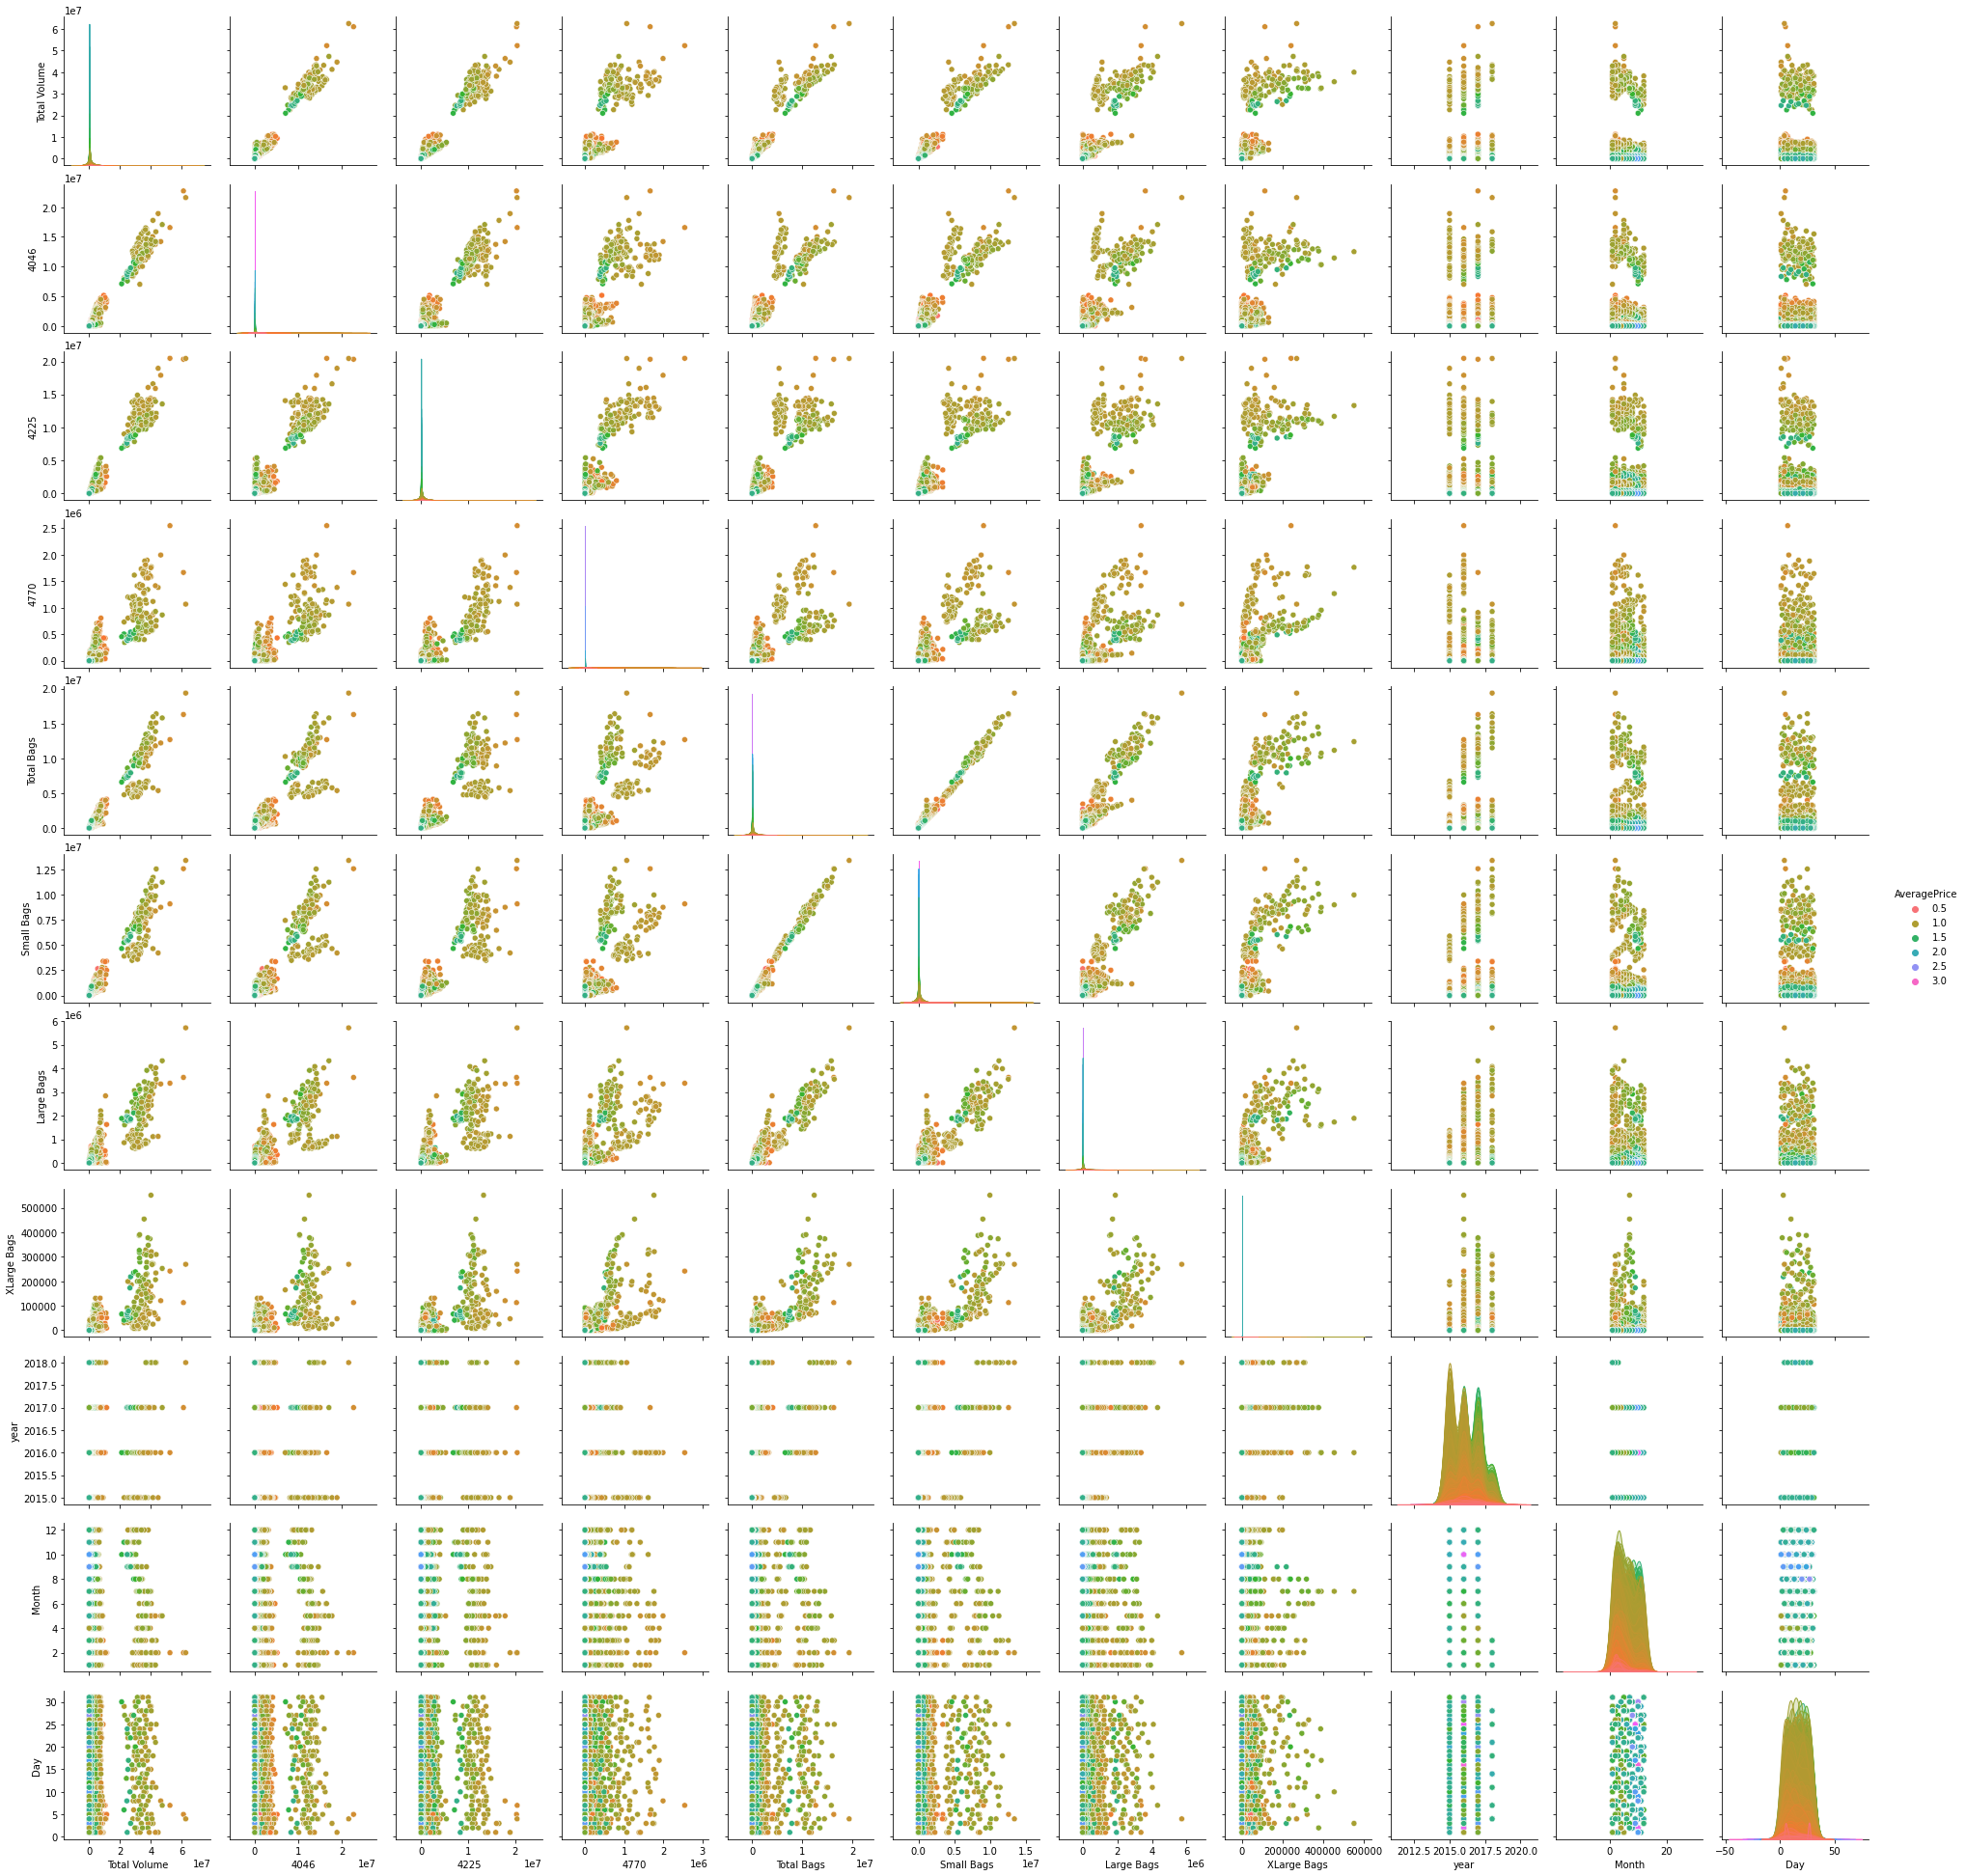

In [58]:
sns.pairplot(df,hue="AveragePrice",palette="husl")


This pair plot gives the pairwise relation between the columns which is plotted on the basis of target variable "AveragePrice". Here we can observe the relation between the features and label.

From this pairplot we can observe that the existence of correlation between two variables and on the diagonal we can see distribution plotting.

Here we can infer that linear relationship exists in most of the columns and others have no much relationship with each other.

We can also notice the correlation between the features and some columns have outliers which we will remove using appropriate methods.
Day column is highly correlated with all the other features.


# Identifying the outliers


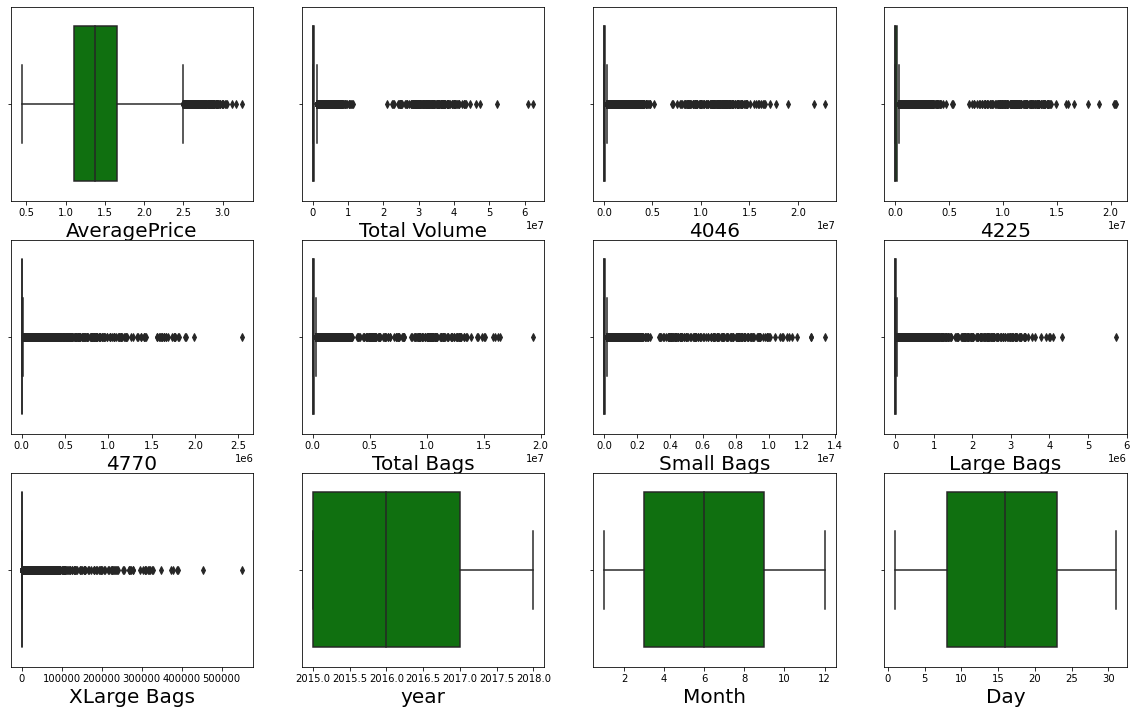

In [12]:
numerical_col=['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year','Month', 'Day']
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numerical_col:
    if plotnumber<=18:
        ax = plt.subplot(6,4,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()


The outliers present in all the columns except year, Month and Day. Let's remove the outliers using Zscore method. Even AveragePrice has outliers, as its our target variable we will not remove outliers from it.



# Removing outliers


# 1.Zscore method


In [62]:
df.columns


Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'Month', 'Day'],
      dtype='object')

In [63]:
# Features containing outliers
feature_cols = df[['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']]


In [64]:
# Using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(feature_cols))

z


array([[0.22771641, 0.23081597, 0.1999022 , ..., 0.2326465 , 0.22235202,
        0.17557961],
       [0.23042664, 0.23110251, 0.20805446, ..., 0.23156838, 0.22233464,
        0.17557961],
       [0.21208462, 0.23100731, 0.1544779 , ..., 0.23339891, 0.22231148,
        0.17557961],
       ...,
       [0.24233073, 0.2306933 , 0.24309014, ..., 0.23164379, 0.22256082,
        0.17557961],
       [0.24162464, 0.2304279 , 0.24265143, ..., 0.22954271, 0.2225293 ,
        0.17557961],
       [0.24125273, 0.22934712, 0.24317042, ..., 0.22811058, 0.22262764,
        0.17557961]])

Now the outliers have been removed.



In [65]:
# Creating new dataframe
new_df = df[(z<3).all(axis=1)] 
new_df


AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0              1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1              1.35      54876.98   674.28   44638.81   58.33     9505.56   
2              0.93     118220.22   794.70  109149.67  130.50     8145.35   
3              1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4              1.28      51039.60   941.48   43838.39   75.78     6183.95   
...             ...           ...      ...        ...     ...         ...   
18244          1.63      17074.83  2046.96    1529.20    0.00    13498.67   
18245          1.71      13888.04  1191.70    3431.50    0.00     9264.84   
18246          1.87      13766.76  1191.92    2452.79  727.94     9394.11   
18247          1.93      16205.22  1527.63    2981.04  727.01    10969.54   
18248          1.62      17489.58  2894.77    2356.13  224.53    12014.15   

       Small Bags  Large Bags  XLarge Bags          type  year  \
0         8603.62       93.25          0.0  conventional  2015   
1         9408.07       97.49          0.0  conventional  2015   
2         8042.21      103.14          0.0  conventional  2015   
3         5677.40      133.76          0.0  conventional  2015   
4         5986.26      197.69          0.0  conventional  2015   
...           ...         ...          ...           ...   ...   
18244    13066.82      431.85          0.0       organic  2018   
18245     8940.04      324.80          0.0       organic  2018   
18246     9351.80       42.31          0.0       organic  2018   
18247    10919.54       50.00          0.0       organic  2018   
18248    11988.14       26.01          0.0       organic  2018   

                 region  Month  Day  
0                Albany     12   27  
1                Albany     12   20  
2                Albany     12   13  
3                Albany     12    6  
4                Albany     11   29  
...                 ...    ...  ...  
18244  WestTexNewMexico      2    4  
18245  WestTexNewMexico      1   28  
18246  WestTexNewMexico      1   21  
18247  WestTexNewMexico      1   14  
18248  WestTexNewMexico      1    7  

[17782 rows x 14 columns]

This is the new dataframe after removing the outliers. Here we have removed the outliers whose Zscore is less than 3.



In [16]:
# Shape of original dataset
df.shape


(18249, 14)

Original dataset contains 18249 rows and 14 columns

In [19]:
# Shape of new dataframe
new_df.shape

(17782, 14)

after Removing outliers dataset contains 17782 rows and 14 columns

In [67]:
# Checking the the data loss
data_loss = (18249-17782)/18249*100
data_loss


2.55904433119623

Here we are loosing 2.5% data which is less than 10%

# 2. IQR (Inter Quantile Range) method


In [69]:
# 1st quantile
Q1=feature_cols.quantile(0.25)

# 3rd quantile
Q3=feature_cols.quantile(0.75)

# IQR
IQR=Q3 - Q1

df1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [70]:
df1.shape


(11747, 14)

the dataset contains 11747 rows and 14 columns after outliers removal

In [71]:
# Let's check the dataloss
data_loss = (18249-11747)/18249*100
data_loss


35.62934955340019

Using IQR method the data loss is 35.62% which is not feasible, So i am considering Z score method

# Checking for skewness


In [66]:
# Checking the skewness
new_df.skew()


AveragePrice    0.560969
Total Volume    3.782060
4046            4.928850
4225            4.472729
4770            5.137120
Total Bags      4.082103
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

All the columns have skewness except year, Month and Day. AveragePrice is our label so no need to remove skewness in this column.



# Removing skewness using yeo-johnson method


In [67]:
# Removing skewness using yeo-johnson method to get better prediction
features = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [68]:
new_df[features] = scaler.fit_transform(new_df[features].values)
new_df[features].head()

Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0     -0.065094 -0.649918  0.358278 -0.212550   -0.527445   -0.337064   
1     -0.137269 -0.770067  0.276355 -0.165117   -0.488205   -0.301038   
2      0.215503 -0.724508  0.656010  0.034215   -0.556204   -0.364044   
3      0.029840 -0.625017  0.475615 -0.110976   -0.702370   -0.500341   
4     -0.170456 -0.677083  0.268966 -0.100289   -0.675712   -0.479918   

   Large Bags  XLarge Bags  
0   -0.775214    -0.675702  
1   -0.765237    -0.675702  
2   -0.752534    -0.675702  
3   -0.693012    -0.675702  
4   -0.600755    -0.675702

In [69]:
# Checking skewness after using yeo=johnson ethod
new_df.skew()


AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.860603
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

After using yeo-johnson method the skewness is still present in XLarge Bags, Let's remove skewness using log transformation.



In [72]:
# Removing skewness using log transformation
new_df["XLarge Bags"] = np.log1p(new_df["XLarge Bags"])


The skewness has been removed, now let's check it.



In [73]:
# Let's check the skewness again
new_df.skew()


AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags    -2.926443
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

In [74]:
# Removing skewness using log transformation
new_df["XLarge Bags"] = np.log1p(new_df["XLarge Bags"])


In [71]:
new_df.skew()


AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.791499
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

In [75]:
f1=["XLarge Bags"]
new_df[f1] = scaler.fit_transform(new_df[f1].values)


In [31]:
new_df.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags    -0.185953
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

Finally the skewness removed from all columns.

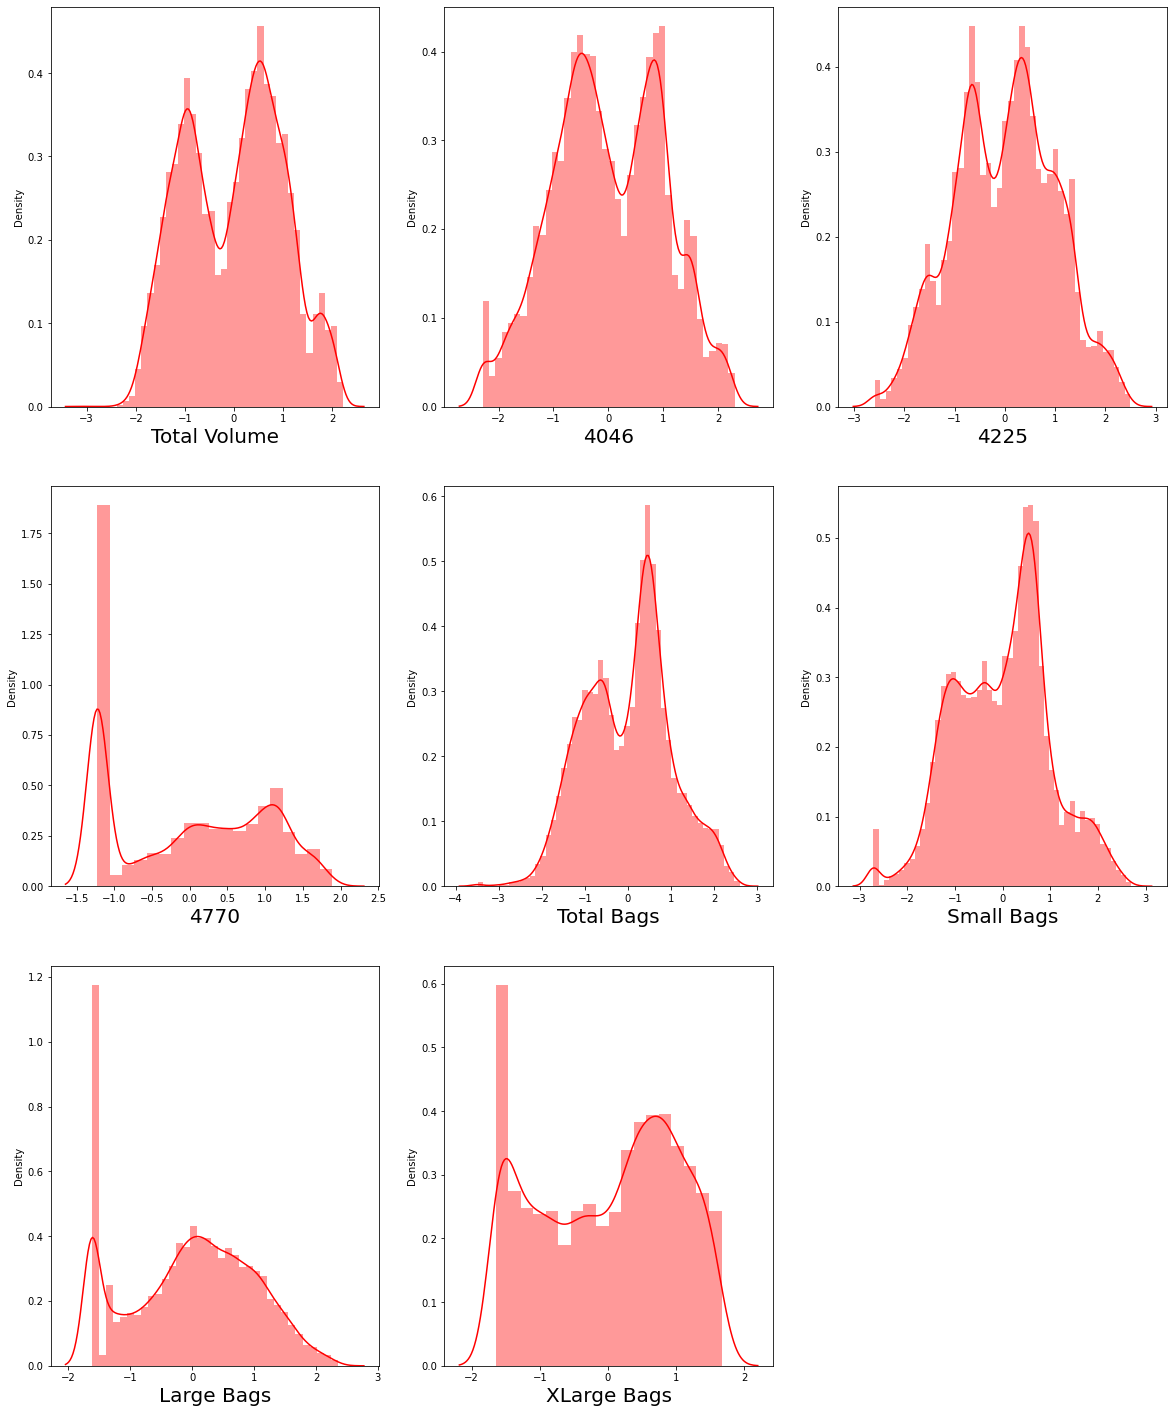

In [32]:
# After removing let's check how the data has been distributed in each column.

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in new_df[features]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(new_df[column],color='r')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()


The data looks almost normal compare to previous data and the skewness is also removed.



# Encoding the categorical columns using Label Encoding


In [76]:
categorical_col = ["type","region"]


In [77]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_df[categorical_col]= new_df[categorical_col].apply(LE.fit_transform)


In [78]:
new_df[categorical_col]


type  region
0         0       0
1         0       0
2         0       0
3         0       0
4         0       0
...     ...     ...
18244     1      53
18245     1      53
18246     1      53
18247     1      53
18248     1      53

[17782 rows x 2 columns]

the data after encoding the features using label encoder.

# Correlation between the target variable and independent variables using HEAT map


In [79]:
# Checking the correlation between features and the target
cor = new_df.corr()
cor


AveragePrice  Total Volume      4046      4225      4770  \
AveragePrice      1.000000     -0.576829 -0.548618 -0.448579 -0.491320   
Total Volume     -0.576829      1.000000  0.889083  0.924160  0.818568   
4046             -0.548618      0.889083  1.000000  0.764679  0.736523   
4225             -0.448579      0.924160  0.764679  1.000000  0.796799   
4770             -0.491320      0.818568  0.736523  0.796799  1.000000   
Total Bags       -0.564616      0.939776  0.799354  0.818511  0.761641   
Small Bags       -0.493621      0.905098  0.778765  0.784901  0.754305   
Large Bags       -0.477879      0.681427  0.601899  0.614878  0.548457   
XLarge Bags      -0.015400      0.312483  0.213550  0.292010  0.281888   
type              0.608447     -0.800828 -0.725826 -0.747722 -0.780988   
year              0.099910      0.076584 -0.002396 -0.004533 -0.051657   
region            0.010428      0.065709  0.159390  0.032273  0.037805   
Month             0.157900     -0.026332 -0.025919 -0.024708 -0.017377   
Day               0.024742     -0.006248 -0.004558 -0.005919  0.001383   

              Total Bags  Small Bags  Large Bags  XLarge Bags      type  \
AveragePrice   -0.564616   -0.493621   -0.477879    -0.015400  0.608447   
Total Volume    0.939776    0.905098    0.681427     0.312483 -0.800828   
4046            0.799354    0.778765    0.601899     0.213550 -0.725826   
4225            0.818511    0.784901    0.614878     0.292010 -0.747722   
4770            0.761641    0.754305    0.548457     0.281888 -0.780988   
Total Bags      1.000000    0.949901    0.729652     0.313948 -0.725686   
Small Bags      0.949901    1.000000    0.566307     0.310321 -0.720466   
Large Bags      0.729652    0.566307    1.000000     0.186528 -0.500026   
XLarge Bags     0.313948    0.310321    0.186528     1.000000 -0.192106   
type           -0.725686   -0.720466   -0.500026    -0.192106  1.000000   
year            0.210924    0.185955    0.190295     0.109088  0.007399   
region          0.065996    0.051985    0.086573    -0.078391  0.021970   
Month          -0.014571   -0.010260   -0.016942    -0.036398 -0.005044   
Day            -0.003703   -0.000535   -0.000876    -0.005497 -0.002469   

                  year    region     Month       Day  
AveragePrice  0.099910  0.010428  0.157900  0.024742  
Total Volume  0.076584  0.065709 -0.026332 -0.006248  
4046         -0.002396  0.159390 -0.025919 -0.004558  
4225         -0.004533  0.032273 -0.024708 -0.005919  
4770         -0.051657  0.037805 -0.017377  0.001383  
Total Bags    0.210924  0.065996 -0.014571 -0.003703  
Small Bags    0.185955  0.051985 -0.010260 -0.000535  
Large Bags    0.190295  0.086573 -0.016942 -0.000876  
XLarge Bags   0.109088 -0.078391 -0.036398 -0.005497  
type          0.007399  0.021970 -0.005044 -0.002469  
year          1.000000 -0.003610 -0.173166  0.004044  
region       -0.003610  1.000000  0.002175  0.000751  
Month        -0.173166  0.002175  1.000000  0.010456  
Day           0.004044  0.000751  0.010456  1.000000

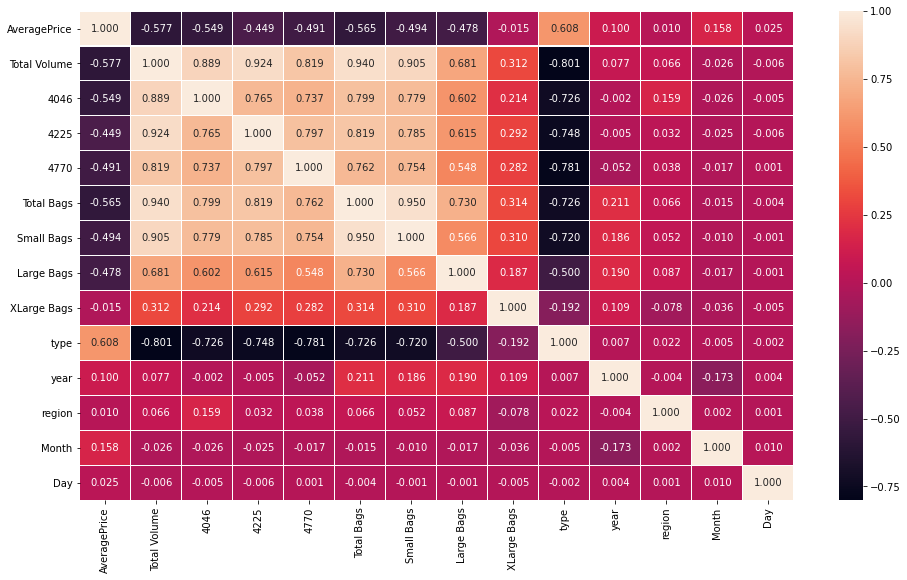

In [80]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(16,9))
sns.heatmap(new_df.corr(),linewidths=.1,fmt='0.3f', annot = True)
plt.yticks(rotation=0);


This heatmap shows the correlation matrix by visualizing the data. we can observe the relation between one feature to other.

This heat map contains both positive and negative correlation.

Almost all the features are highly negatively correlated with the target variable and few columns year, Month and type have positive correlation with the target.

The features Day and region have no relation with the target so we can drop these columns.

Almost all the features are correlated with each other which leads to multicollinearity problem. We will solve this problem by VIF value.

Also most of the columns have no relation with each other and have zero correlation.


In [38]:
cor['AveragePrice'].sort_values(ascending=False)


AveragePrice    1.000000
type            0.608447
Month           0.157900
year            0.099910
Day             0.024742
region          0.010428
XLarge Bags    -0.011246
4225           -0.448579
Large Bags     -0.477879
4770           -0.491320
Small Bags     -0.493621
4046           -0.548618
Total Bags     -0.564616
Total Volume   -0.576829
Name: AveragePrice, dtype: float64

# Visualizing the correlation between label and features using bar plot


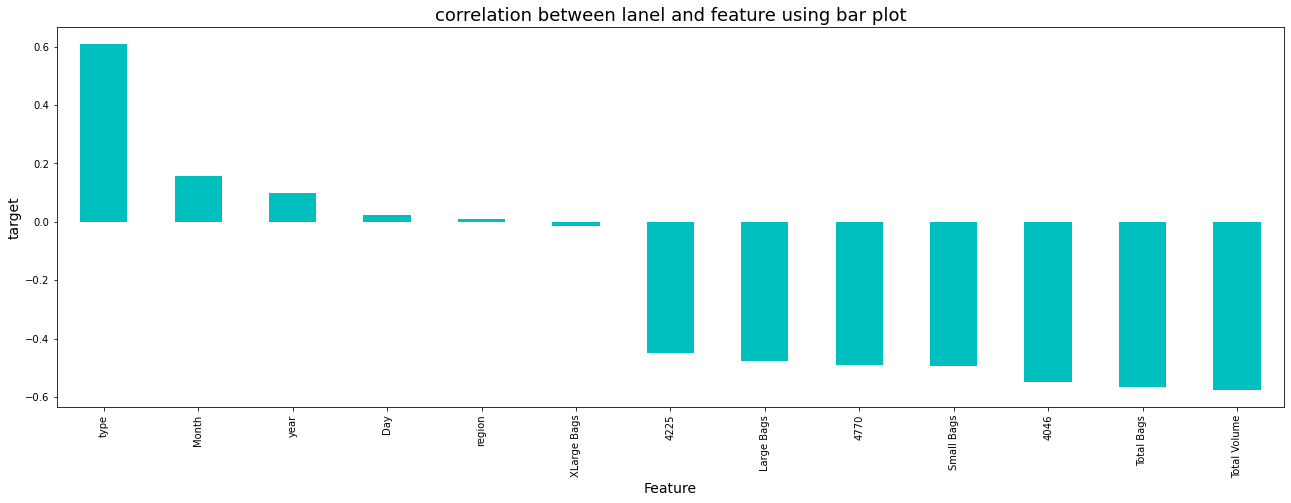

In [81]:
plt.figure(figsize=(22,7))
new_df.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('target',fontsize=14)
plt.title('correlation between lanel and feature using bar plot',fontsize=18)
plt.show()


The features region,Day and XLarge Bags have very less correlation with the target so we can drop these columns.



In [82]:
# Dropping irrelevant columns
new_df.drop("region",axis=1, inplace=True)
new_df.drop("Day",axis=1, inplace=True)
new_df.drop("XLarge Bags",axis=1, inplace=True)


In [83]:
new_df.head()


AveragePrice  Total Volume      4046      4225      4770  Total Bags  \
0          1.33     -0.065094 -0.649918  0.358278 -0.212550   -0.527445   
1          1.35     -0.137269 -0.770067  0.276355 -0.165117   -0.488205   
2          0.93      0.215503 -0.724508  0.656010  0.034215   -0.556204   
3          1.08      0.029840 -0.625017  0.475615 -0.110976   -0.702370   
4          1.28     -0.170456 -0.677083  0.268966 -0.100289   -0.675712   

   Small Bags  Large Bags  type  year  Month  
0   -0.337064   -0.775214     0  2015     12  
1   -0.301038   -0.765237     0  2015     12  
2   -0.364044   -0.752534     0  2015     12  
3   -0.500341   -0.693012     0  2015     12  
4   -0.479918   -0.600755     0  2015     11

This is the dataframe after removing irrelevant columns.



# Separating the features and label variables into x and y


In [84]:
x = new_df.drop("AveragePrice", axis=1)
y = new_df["AveragePrice"]


In [85]:
x.shape


(17782, 10)

In [86]:
y.shape


(17782,)

In [87]:
x.head()


Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0     -0.065094 -0.649918  0.358278 -0.212550   -0.527445   -0.337064   
1     -0.137269 -0.770067  0.276355 -0.165117   -0.488205   -0.301038   
2      0.215503 -0.724508  0.656010  0.034215   -0.556204   -0.364044   
3      0.029840 -0.625017  0.475615 -0.110976   -0.702370   -0.500341   
4     -0.170456 -0.677083  0.268966 -0.100289   -0.675712   -0.479918   

   Large Bags  type  year  Month  
0   -0.775214     0  2015     12  
1   -0.765237     0  2015     12  
2   -0.752534     0  2015     12  
3   -0.693012     0  2015     12  
4   -0.600755     0  2015     11

# Standard Scalarization


In [88]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x


Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0         -0.065094 -0.649918  0.358278 -0.212550   -0.527445   -0.337064   
1         -0.137269 -0.770067  0.276355 -0.165117   -0.488205   -0.301038   
2          0.215503 -0.724508  0.656010  0.034215   -0.556204   -0.364044   
3          0.029840 -0.625017  0.475615 -0.110976   -0.702370   -0.500341   
4         -0.170456 -0.677083  0.268966 -0.100289   -0.675712   -0.479918   
...             ...       ...       ...       ...         ...         ...   
17777     -0.668931 -0.454078 -0.922232 -1.224990   -0.331042   -0.165765   
17778     -0.762380 -0.610403 -0.665649 -1.224990   -0.499550   -0.321645   
17779     -0.766344 -0.610350 -0.774395  0.455355   -0.493424   -0.303466   
17780     -0.692595 -0.539211 -0.711605  0.455045   -0.424475   -0.240252   
17781     -0.658062 -0.351503 -0.787209  0.168008   -0.383676   -0.201685   

       Large Bags      type      year     Month  
0       -0.775214 -1.026443 -1.214908  1.641434  
1       -0.765237 -1.026443 -1.214908  1.641434  
2       -0.752534 -1.026443 -1.214908  1.641434  
3       -0.693012 -1.026443 -1.214908  1.641434  
4       -0.600755 -1.026443 -1.214908  1.358706  
...           ...       ...       ...       ...  
17777   -0.405895  0.974238  1.979143 -1.185845  
17778   -0.478556  0.974238  1.979143 -1.468572  
17779   -0.945246  0.974238  1.979143 -1.468572  
17780   -0.910471  0.974238  1.979143 -1.468572  
17781   -1.042930  0.974238  1.979143 -1.468572  

[17782 rows x 10 columns]

I have scaled data now. Since we have multicollinearity problem, so let's use VIF factor to find it out.



# Checking VIF values to solve multicollinearity


In [89]:
# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif


VIF values      Features
0   51.514500  Total Volume
1    6.752052          4046
2   11.107238          4225
3    3.889958          4770
4   34.407596    Total Bags
5   16.619938    Small Bags
6    3.460219    Large Bags
7    3.320108          type
8    1.332828          year
9    1.048624         Month

The VIF value is more than 10 in the features Total Volume, 4225, Total Bags, Small Bags and Large Bags. First I will remove the column having high VIF value and will check the VIF again, if the value retains more than 10 then I will drop the specific column again.



In [90]:
# Dropping the feature Total Volume
x.drop("Total Volume",axis=1, inplace=True)


In [91]:
# Againing checking the VIF after removing one column

vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif


VIF values    Features
0    3.535489        4046
1    4.271391        4225
2    3.869712        4770
3   24.476998  Total Bags
4   16.619499  Small Bags
5    3.415370  Large Bags
6    3.129875        type
7    1.328227        year
8    1.045898       Month

The multocollinearity problem still exists so let's drop the feature Total Bags which has VIF value more than 10.



In [93]:
# Dropping the column Total Bags
x.drop("Total Bags",axis=1, inplace=True)


In [94]:
# Checking VIF again
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif


VIF values    Features
0    3.516801        4046
1    4.127073        4225
2    3.869358        4770
3    4.094089  Small Bags
4    1.861811  Large Bags
5    3.127411        type
6    1.304547        year
7    1.045306       Month

The VIF value is less than 10 in all the features which means we have solved the multicollinearity problem. Now we can move to model building.



In [96]:
# DataFrame after preprocessing and data cleaning
x.head()


4046      4225      4770  Small Bags  Large Bags      type      year  \
0 -0.649918  0.358278 -0.212550   -0.337064   -0.775214 -1.026443 -1.214908   
1 -0.770067  0.276355 -0.165117   -0.301038   -0.765237 -1.026443 -1.214908   
2 -0.724508  0.656010  0.034215   -0.364044   -0.752534 -1.026443 -1.214908   
3 -0.625017  0.475615 -0.110976   -0.500341   -0.693012 -1.026443 -1.214908   
4 -0.677083  0.268966 -0.100289   -0.479918   -0.600755 -1.026443 -1.214908   

      Month  
0  1.641434  
1  1.641434  
2  1.641434  
3  1.641434  
4  1.358706

# Modeling


# Finding best random state


In [97]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [98]:
from sklearn.neighbors import KNeighborsRegressor as KNN
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod = KNN()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)


Maximum r2 score is  0.8713785722744993  on Random_state  3


 I am getting maximum R2 score 87% on the basis of Random state 3.



# Creating new train test split


In [99]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)


# Regression Algorithms


In [100]:
from sklearn.linear_model import LinearRegression, Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics


# Random Forest Regressor


In [101]:
# Checking R2 score for  Random Forest Regressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)

# prediction
pred_RFR=RFR.predict(x_test)
print('R2_Score:',r2_score(y_test,pred_RFR))

# Mean Absolute Error (MAE)
print('MAE:',metrics.mean_absolute_error(y_test, pred_RFR))

# Mean Squared Error (MSE)
print('MSE:',metrics.mean_squared_error(y_test, pred_RFR))

# Root Mean Squared Error (RMSE)
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred_RFR)))

# Checking cv score for Random Forest Regression
print("Cross_Validaton_Score",cross_val_score(RFR,x,y,cv=5).mean())


R2_Score: 0.8702925856523727
MAE: 0.10140491096532332
MSE: 0.021235002781630742
RMSE: 0.1457223482573306
Cross_Validaton_Score 0.20517060519291608


The R2 score of Random forest regressor is 87%

# Support Vector Machine Regressor


In [102]:
# Checking R2 score for Support Vector Machine Regressor
svr=SVR()
svr.fit(x_train,y_train)

# prediction
predsvr=svr.predict(x_test)
print('R2_Score:',r2_score(y_test,predsvr))
print('MAE:',metrics.mean_absolute_error(y_test, predsvr))
print('MSE:',metrics.mean_squared_error(y_test, predsvr))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predsvr)))

# Checking cv score for SVR 
print("Cross_Validaton_Score",cross_val_score(svr,x,y,cv=5).mean())


R2_Score: 0.7808674950601481
MAE: 0.13872073992854198
MSE: 0.035875199388928275
RMSE: 0.18940749559858575
Cross_Validaton_Score 0.1808287388492348


The R2 score using SVR model is 78%.



# Linear Regression


In [103]:
# Checking r2score for Linear Regression
LR = LinearRegression()
LR.fit(x_train,y_train)

# prediction
predLR=LR.predict(x_test)
print('R2_score:',r2_score(y_test,predLR))
print('MAE:',metrics.mean_absolute_error(y_test, predLR))
print('MSE:',metrics.mean_squared_error(y_test, predLR))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predLR)))

# Checking cv score for Linear Regression
print("Cross_Validaton_Score",cross_val_score(LR,x,y,cv=5).mean())


R2_score: 0.5086200160080887
MAE: 0.21983896456310725
MSE: 0.08044609769909254
RMSE: 0.28363021295181606
Cross_Validaton_Score 0.09076356046567187


The R2 score for Linear Regressor is 50.9%.



# Stochastic Gradient Descent Regressor


In [104]:
# Checking R2 score for Gradient Descent Regressor
SGD=SGDRegressor()
SGD.fit(x_train,y_train)

# prediction
predSGD=SGD.predict(x_test)
print('R2_Score:',r2_score(y_test,predSGD))
print('MAE:',metrics.mean_absolute_error(y_test, predSGD))
print('MSE:',metrics.mean_squared_error(y_test, predSGD))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predSGD)))

# Checking cv score for Stochastic Gradient Descent Regressor
print("Cross_Validaton_Score",cross_val_score(SGD,x,y,cv=5).mean())


R2_Score: 0.5078912889093334
MAE: 0.2195323630702476
MSE: 0.0805654009944897
RMSE: 0.28384044989128965
Cross_Validaton_Score 0.08592709310622122


The R2 score for SGDRegressor is 50.79%.



# KNeighbors Regressor


In [105]:
# Checking R2 score for KNN Regressor
knn=KNN()
knn.fit(x_train,y_train)

# prediction
predknn=knn.predict(x_test)
print('R2_Score:',r2_score(y_test,predknn))
print('MAE:',metrics.mean_absolute_error(y_test, predknn))
print('MSE:',metrics.mean_squared_error(y_test, predknn))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predknn)))

# Checking cv score for KNN
print("Cross_Validaton_Score",cross_val_score(knn,x,y,cv=5).mean())


R2_Score: 0.8713785722744993
MAE: 0.10169334582942832
MSE: 0.021057210871602623
RMSE: 0.14511102946227974
Cross_Validaton_Score 0.07540491995432877


The R2 score using KNN regressor is 87%.



# GradientBoosting Regressor


In [106]:
# Checking R2 score for  GradientBoosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
GB=GradientBoostingRegressor()
GB.fit(x_train,y_train)

# prediction
predGB=GB.predict(x_test)
print('R2_Score:',metrics.r2_score(y_test,predGB))
print('MAE:',metrics.mean_absolute_error(y_test, predGB))
print('MSE:',metrics.mean_squared_error(y_test, predGB))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predGB)))

# Checking cv score for GradientBoosting Regressor
print("Cross_Validaton_Score",cross_val_score(GB,x,y,cv=5).mean())


R2_Score: 0.7247624886154702
MAE: 0.16123517664317968
MSE: 0.045060410380206806
RMSE: 0.21227437523216694
Cross_Validaton_Score 0.3616988541164849


Thr R2 score using GradientBoosting Regressor regressor is 72%.



From the difference between R2 score and Cross Validation Score we can conclude that KNeighbors Regressor as our best fitting model.



# Hyperparameter Tuning


In [107]:
from sklearn.model_selection import GridSearchCV


In [108]:
#KNeighbors Regressor
parameters = {'n_neighbors':[2,3,4,5,6],
              'algorithm':['auto','ball_tree', 'kd_tree', 'brute'],
              'leaf_size':[10,20,30,40,50],
              'weights':['uniform','distance']}


In [109]:
GCV=GridSearchCV(KNN(),parameters,cv=5)


In [110]:
GCV.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40, 50],
                         'n_neighbors': [2, 3, 4, 5, 6],
                         'weights': ['uniform', 'distance']})

In [111]:
GCV.best_params_


{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 4, 'weights': 'distance'}

In [112]:
avocado =KNN(algorithm='auto', leaf_size=10, n_neighbors=4, weights='distance')
avocado.fit(x_train, y_train)
pred = avocado.predict(x_test)
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, pred_RFR)))
print('R2_Score:',r2_score(y_test,pred)*100)


RMSE value: 0.1457223482573306
R2_Score: 88.64384660938826


After tuning the R2 score of the model is increasing and is giving 88% which is good.



# Saving the model


In [113]:
# Saving the model using .pkl
import joblib
joblib.dump(avocado,"Avocado_price.pkl")


['Avocado_price.pkl']

# Predicting the saved model


In [115]:
# Let's load the saved model and get the prediction

# Loading the saved model
model=joblib.load("Avocado_price.pkl")

#Prediction
prediction = model.predict(x_test)
prediction


array([1.29176364, 1.73808167, 1.67531857, ..., 1.18095361, 1.77959254,
       0.95603886])

These are the predicted average price of the avocado.



In [116]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])


0         1         2        3         4         5        6     \
Predicted  1.291764  1.738082  1.675319  1.47726  1.585465  2.188334  1.37051   
Original   1.340000  1.680000  1.810000  1.52000  1.620000  2.200000  1.33000   

               7        8         9     ...      5325      5326      5327  \
Predicted  1.342432  1.92992  1.076811  ...  1.882442  1.619123  1.401968   
Original   1.180000  2.02000  1.080000  ...  1.850000  1.370000  1.270000   

               5328      5329      5330     5331      5332      5333      5334  
Predicted  0.816147  1.897282  1.324965  1.55679  1.180954  1.779593  0.956039  
Original   0.790000  2.060000  1.260000  1.63000  0.770000  1.840000  0.860000  

[2 rows x 5335 columns]

We can observe both original and predicted values are almost same.



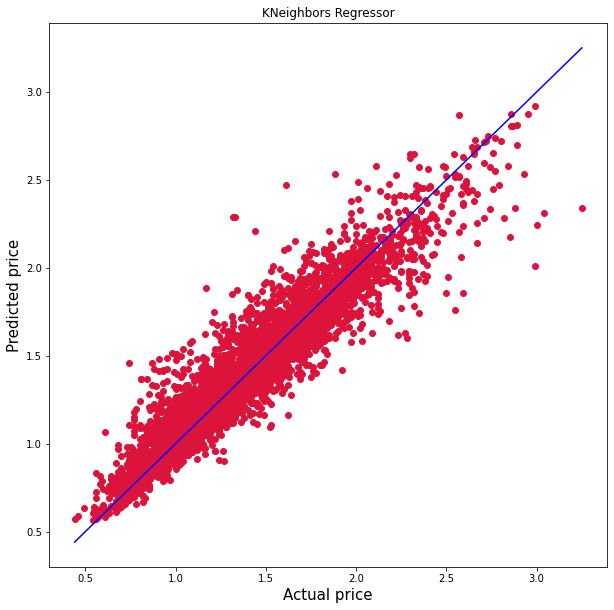

In [118]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, prediction, c='crimson')
plt1 = max(max(prediction), max(y_test))
plt2 = min(min(prediction), min(y_test))
plt.plot([plt1, plt2], [plt1, plt2], 'b-')
plt.title("KNeighbors Regressor")
plt.xlabel('Actual price', fontsize=15)
plt.ylabel('Predicted price', fontsize=15)
plt.show()


# 2.Classification Problem- Region

In [66]:
# Reading the csv file from dataset
df = pd.read_csv('avocado.csv')
df


Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0       48.16     8696.87     8603.62       93.25          0.0  conventional   
1       58.33     9505.56     9408.07       97.49          0.0  conventional   
2      130.50     8145.35     8042.21      103.14          0.0  conventional   
3       72.58     5811.16     5677.40      133.76          0.0  conventional   
4       75.78     6183.95     5986.26      197.69          0.0  conventional   
...       ...         ...         ...         ...          ...           ...   
18244    0.00    13498.67    13066.82      431.85          0.0       organic   
18245    0.00     9264.84     8940.04      324.80          0.0       organic   
18246  727.94     9394.11     9351.80       42.31          0.0       organic   
18247  727.01    10969.54    10919.54       50.00          0.0       organic   
18248  224.53    12014.15    11988.14       26.01          0.0       organic   

       year            region  
0      2015            Albany  
1      2015            Albany  
2      2015            Albany  
3      2015            Albany  
4      2015            Albany  
...     ...               ...  
18244  2018  WestTexNewMexico  
18245  2018  WestTexNewMexico  
18246  2018  WestTexNewMexico  
18247  2018  WestTexNewMexico  
18248  2018  WestTexNewMexico  

[18249 rows x 14 columns]

Dropping irrelevant column unnamed

In [67]:
df.drop("Unnamed: 0",axis=1, inplace=True)


In [68]:
df.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0  2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1  2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2  2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3  2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4  2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  2015  Albany  
3     5811.16     5677.40      133.76          0.0  conventional  2015  Albany  
4     6183.95     5986.26      197.69          0.0  conventional  2015  Albany

In [69]:
# Changing date column from object type to Date Type
df['Date']=pd.to_datetime(df['Date'])


In [70]:
# Checking the type of data again
df.dtypes


Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

In [71]:
df["Month"] = df["Date"].dt.month


In [72]:
df["Day"] = df["Date"].dt.day


In [73]:
df.drop("Date",axis=1,inplace=True)


In [74]:
df.head()


AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags          type  year  region  Month  Day  
0     8603.62       93.25          0.0  conventional  2015  Albany     12   27  
1     9408.07       97.49          0.0  conventional  2015  Albany     12   20  
2     8042.21      103.14          0.0  conventional  2015  Albany     12   13  
3     5677.40      133.76          0.0  conventional  2015  Albany     12    6  
4     5986.26      197.69          0.0  conventional  2015  Albany     11   29

In [75]:
# Checking the uniqueness of target variable
df['region'].unique()


array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [77]:
# List of values in the target variable
df["region"].value_counts()


Charlotte              338
NorthernNewEngland     338
LosAngeles             338
CincinnatiDayton       338
GrandRapids            338
HartfordSpringfield    338
Orlando                338
Houston                338
GreatLakes             338
Roanoke                338
California             338
BuffaloRochester       338
West                   338
SouthCentral           338
Louisville             338
Albany                 338
SouthCarolina          338
Denver                 338
Nashville              338
Portland               338
Chicago                338
SanFrancisco           338
Atlanta                338
Detroit                338
Midsouth               338
LasVegas               338
Seattle                338
DallasFtWorth          338
MiamiFtLauderdale      338
BaltimoreWashington    338
RaleighGreensboro      338
Sacramento             338
SanDiego               338
Boise                  338
NewOrleansMobile       338
NewYork                338
Tampa                  338
P

In [29]:
# Checking wheather the dataset contains any space
df.loc[df['region']==" "]


Empty DataFrame
Columns: [AveragePrice, Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags, type, year, region, Month, Day]
Index: []

In [78]:
# checking for categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)


['type', 'region']


In [79]:
# Now checking for numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)


['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'Month', 'Day']


Charlotte              338
NorthernNewEngland     338
LosAngeles             338
CincinnatiDayton       338
GrandRapids            338
HartfordSpringfield    338
Orlando                338
Houston                338
GreatLakes             338
Roanoke                338
California             338
BuffaloRochester       338
West                   338
SouthCentral           338
Louisville             338
Albany                 338
SouthCarolina          338
Denver                 338
Nashville              338
Portland               338
Chicago                338
SanFrancisco           338
Atlanta                338
Detroit                338
Midsouth               338
LasVegas               338
Seattle                338
DallasFtWorth          338
MiamiFtLauderdale      338
BaltimoreWashington    338
RaleighGreensboro      338
Sacramento             338
SanDiego               338
Boise                  338
NewOrleansMobile       338
NewYork                338
Tampa                  338
P

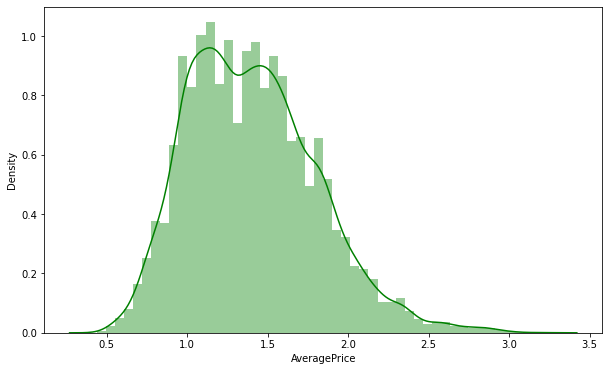

In [32]:
# Distribution plot for target variable "region"
print(df["region"].value_counts())
plt.figure(figsize=(10,6))
sns.distplot(df["AveragePrice"], color="g")
plt.show()


our target variable is normally distributed 

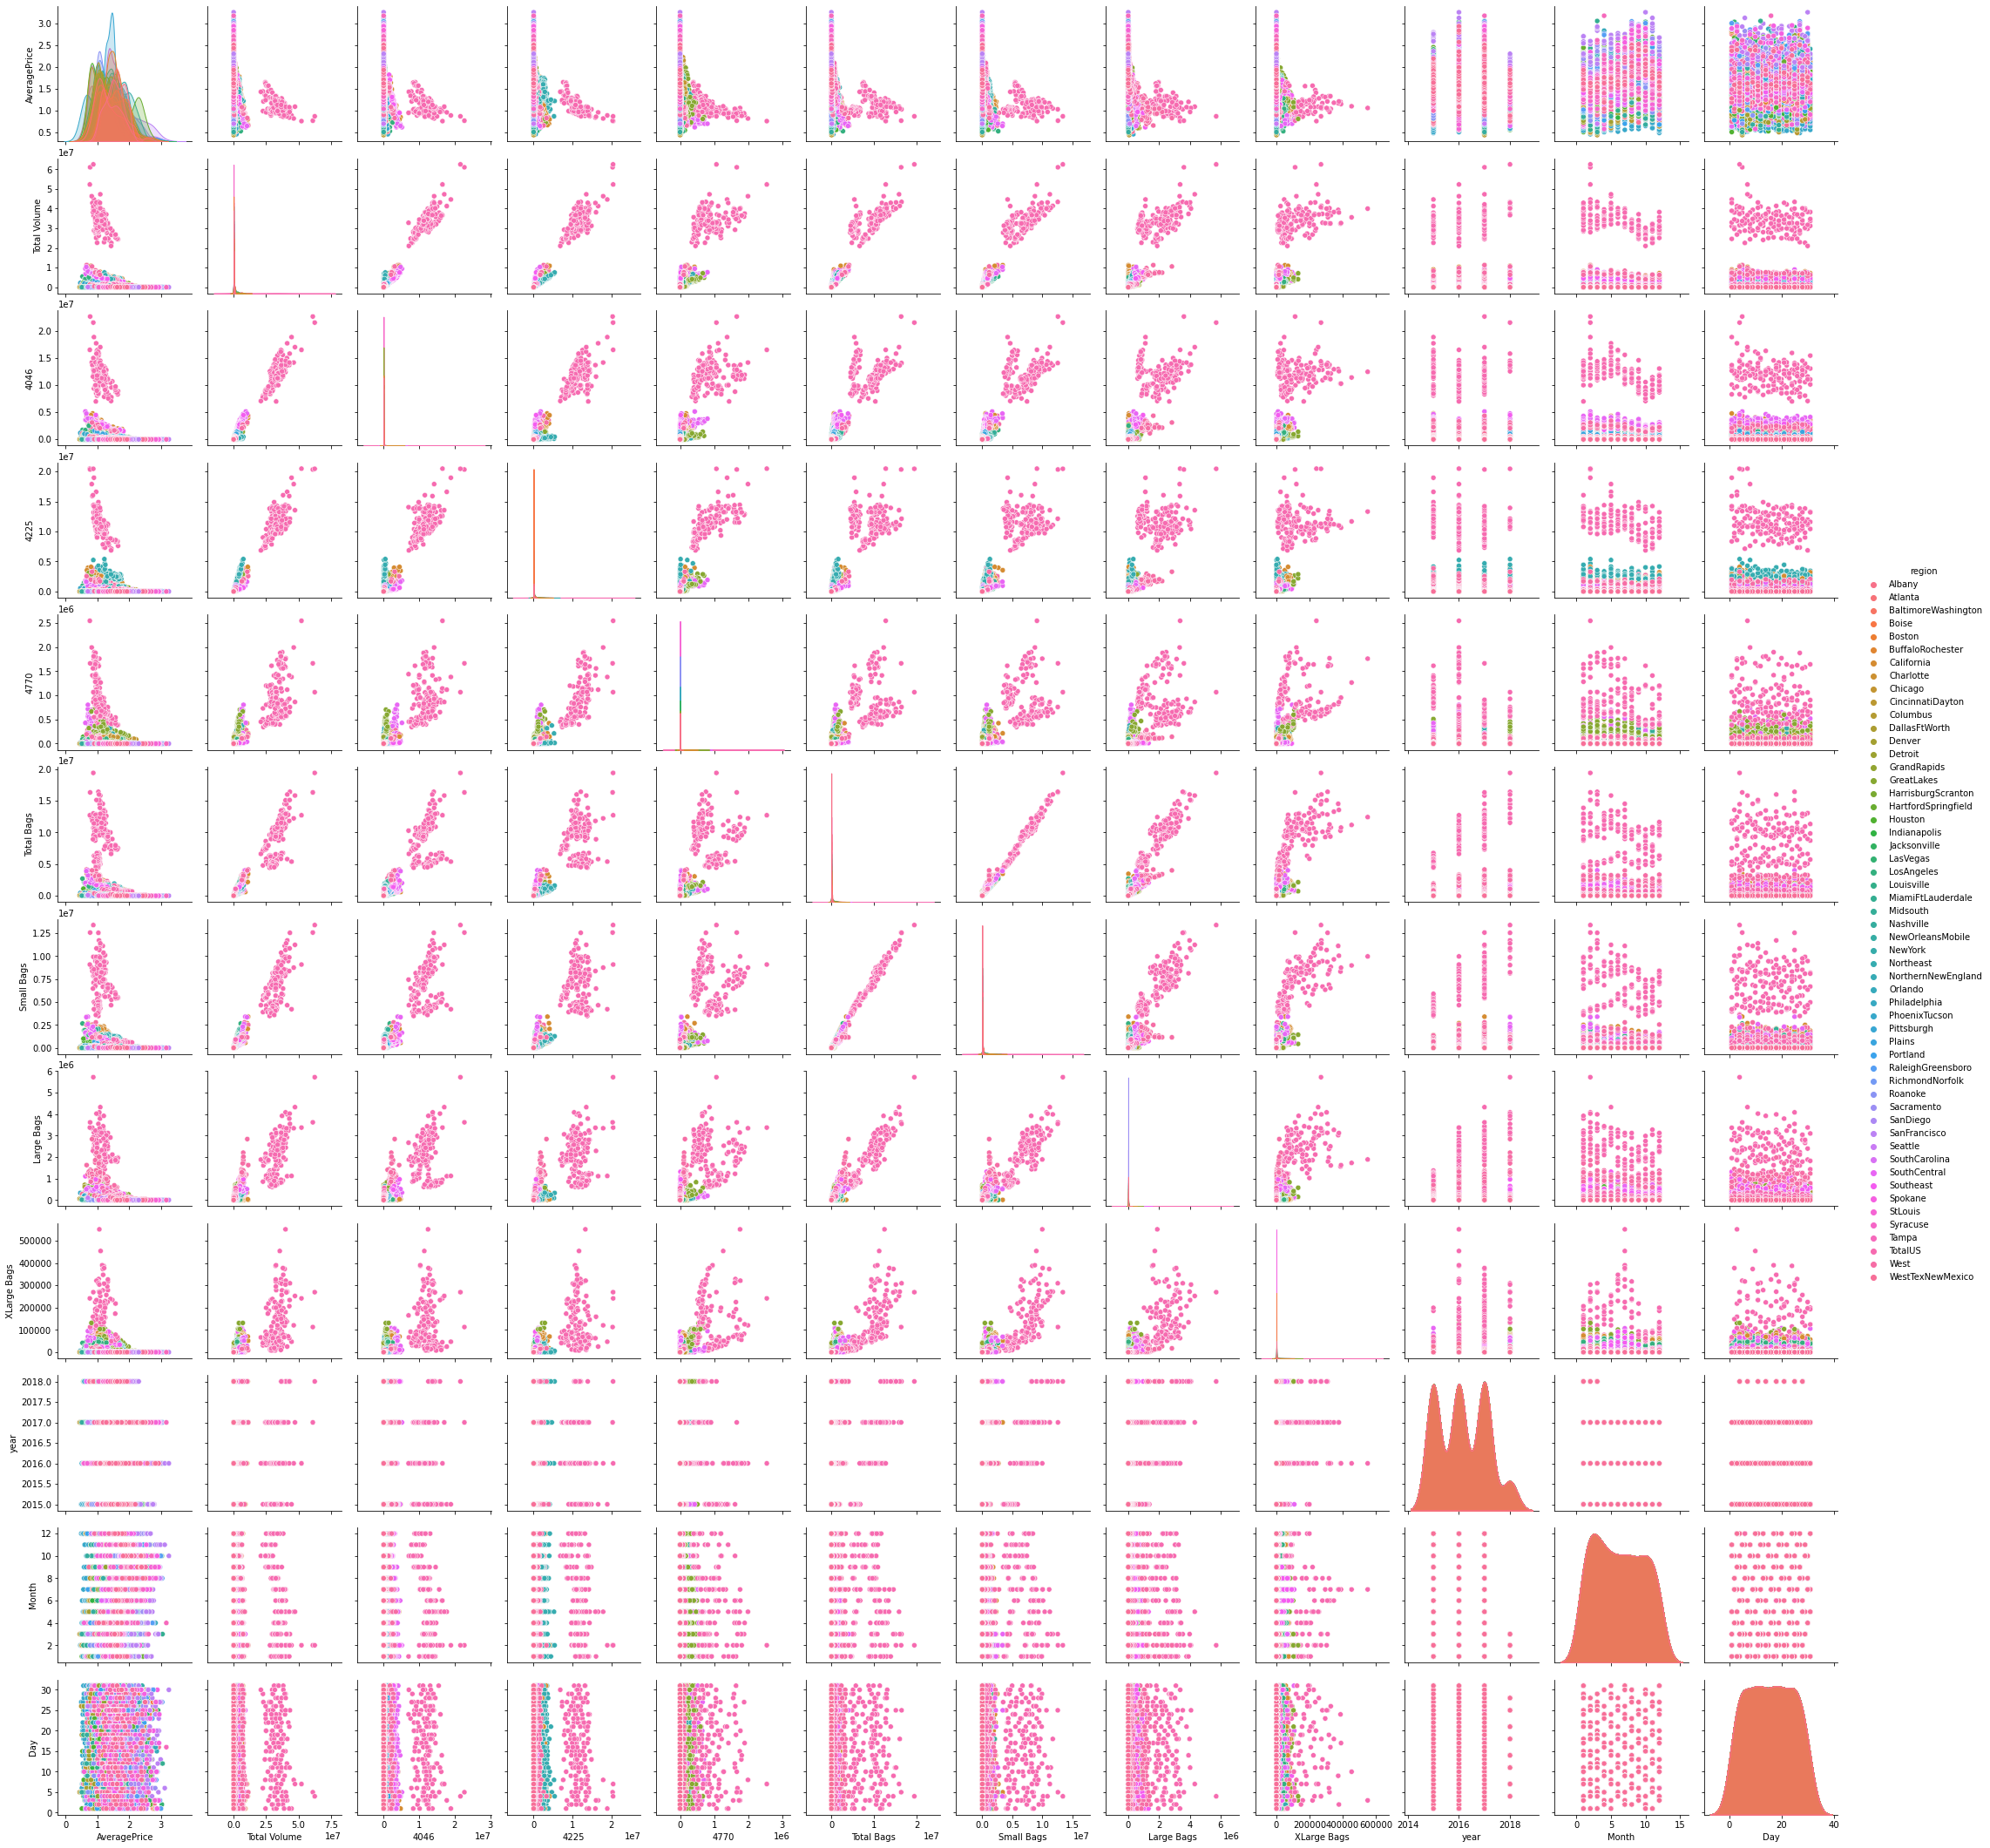

In [33]:
sns.pairplot(df,hue="region",palette="husl")


# Identifying the outliers


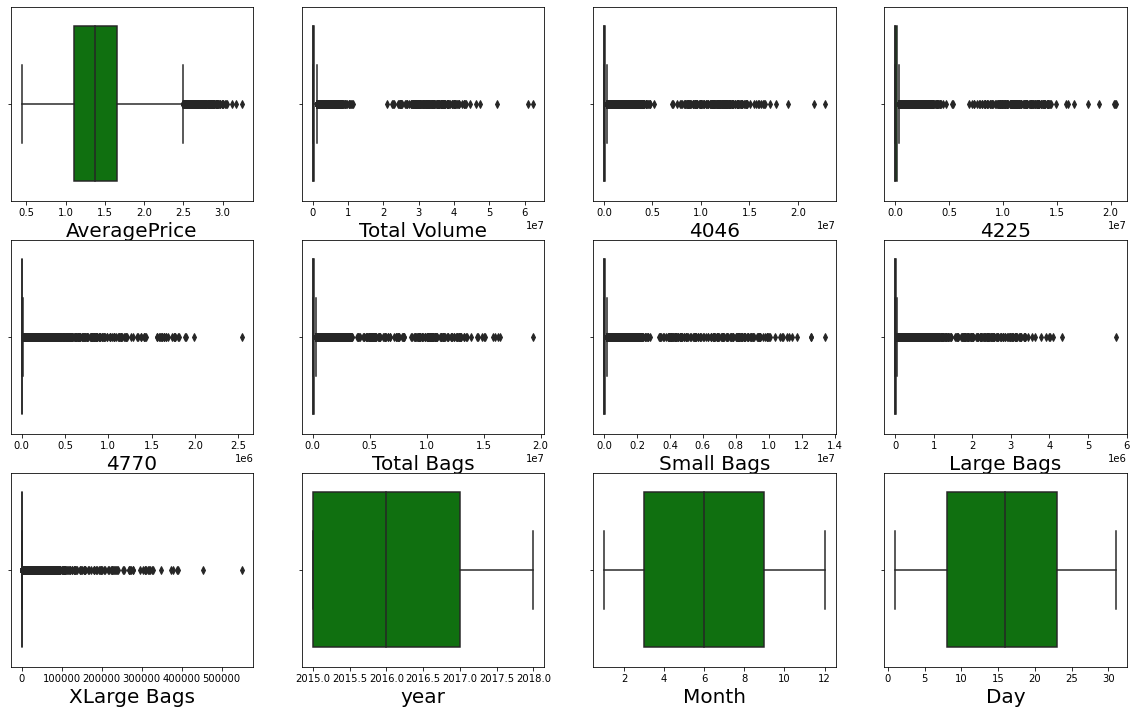

In [34]:
numerical_col=['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year','Month', 'Day']
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numerical_col:
    if plotnumber<=18:
        ax = plt.subplot(6,4,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()


In [80]:
# Features containing outliers
features = df[['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']]


# Removing Outliers using z-score method

In [81]:
# Using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(features))

z

array([[0.22771641, 0.23081597, 0.1999022 , ..., 0.2326465 , 0.22235202,
        0.17557961],
       [0.23042664, 0.23110251, 0.20805446, ..., 0.23156838, 0.22233464,
        0.17557961],
       [0.21208462, 0.23100731, 0.1544779 , ..., 0.23339891, 0.22231148,
        0.17557961],
       ...,
       [0.24233073, 0.2306933 , 0.24309014, ..., 0.23164379, 0.22256082,
        0.17557961],
       [0.24162464, 0.2304279 , 0.24265143, ..., 0.22954271, 0.2225293 ,
        0.17557961],
       [0.24125273, 0.22934712, 0.24317042, ..., 0.22811058, 0.22262764,
        0.17557961]])

In [82]:
# Creating new dataframe
new_df1 = df[(z<3).all(axis=1)] 
new_df1


AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0              1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1              1.35      54876.98   674.28   44638.81   58.33     9505.56   
2              0.93     118220.22   794.70  109149.67  130.50     8145.35   
3              1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4              1.28      51039.60   941.48   43838.39   75.78     6183.95   
...             ...           ...      ...        ...     ...         ...   
18244          1.63      17074.83  2046.96    1529.20    0.00    13498.67   
18245          1.71      13888.04  1191.70    3431.50    0.00     9264.84   
18246          1.87      13766.76  1191.92    2452.79  727.94     9394.11   
18247          1.93      16205.22  1527.63    2981.04  727.01    10969.54   
18248          1.62      17489.58  2894.77    2356.13  224.53    12014.15   

       Small Bags  Large Bags  XLarge Bags          type  year  \
0         8603.62       93.25          0.0  conventional  2015   
1         9408.07       97.49          0.0  conventional  2015   
2         8042.21      103.14          0.0  conventional  2015   
3         5677.40      133.76          0.0  conventional  2015   
4         5986.26      197.69          0.0  conventional  2015   
...           ...         ...          ...           ...   ...   
18244    13066.82      431.85          0.0       organic  2018   
18245     8940.04      324.80          0.0       organic  2018   
18246     9351.80       42.31          0.0       organic  2018   
18247    10919.54       50.00          0.0       organic  2018   
18248    11988.14       26.01          0.0       organic  2018   

                 region  Month  Day  
0                Albany     12   27  
1                Albany     12   20  
2                Albany     12   13  
3                Albany     12    6  
4                Albany     11   29  
...                 ...    ...  ...  
18244  WestTexNewMexico      2    4  
18245  WestTexNewMexico      1   28  
18246  WestTexNewMexico      1   21  
18247  WestTexNewMexico      1   14  
18248  WestTexNewMexico      1    7  

[17782 rows x 14 columns]

# Checking for skewness

In [83]:
# Checking the skewness
new_df1.skew()


AveragePrice    0.560969
Total Volume    3.782060
4046            4.928850
4225            4.472729
4770            5.137120
Total Bags      4.082103
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

In [84]:
# Removing skewness using yeo-johnson method to get better prediction
features = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''


"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [86]:
new_df1[features] = scaler.fit_transform(new_df1[features].values)
new_df1[features].head()


Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0     -0.065094 -0.649918  0.358278 -0.212550   -0.527445   -0.337064   
1     -0.137269 -0.770067  0.276355 -0.165117   -0.488205   -0.301038   
2      0.215503 -0.724508  0.656010  0.034215   -0.556204   -0.364044   
3      0.029840 -0.625017  0.475615 -0.110976   -0.702370   -0.500341   
4     -0.170456 -0.677083  0.268966 -0.100289   -0.675712   -0.479918   

   Large Bags  XLarge Bags  
0   -0.775214    -0.675702  
1   -0.765237    -0.675702  
2   -0.752534    -0.675702  
3   -0.693012    -0.675702  
4   -0.600755    -0.675702

In [90]:
# Checking skewness after using yeo=johnson ethod
new_df1.skew()


AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.791499
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

In [89]:
# Removing skewness using log transformation
new_df1["XLarge Bags"] = np.log1p(new_df1["XLarge Bags"])


In [91]:
# Let's check the skewness again
new_df1.skew()


AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.791499
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

as Xlarge bags still contains skewness we will drop this irrevelant column.

In [92]:
new_df1.drop("XLarge Bags",axis=1, inplace=True)


In [93]:
new_df1.head()

AveragePrice  Total Volume      4046      4225      4770  Total Bags  \
0          1.33     -0.065094 -0.649918  0.358278 -0.212550   -0.527445   
1          1.35     -0.137269 -0.770067  0.276355 -0.165117   -0.488205   
2          0.93      0.215503 -0.724508  0.656010  0.034215   -0.556204   
3          1.08      0.029840 -0.625017  0.475615 -0.110976   -0.702370   
4          1.28     -0.170456 -0.677083  0.268966 -0.100289   -0.675712   

   Small Bags  Large Bags          type  year  region  Month  Day  
0   -0.337064   -0.775214  conventional  2015  Albany     12   27  
1   -0.301038   -0.765237  conventional  2015  Albany     12   20  
2   -0.364044   -0.752534  conventional  2015  Albany     12   13  
3   -0.500341   -0.693012  conventional  2015  Albany     12    6  
4   -0.479918   -0.600755  conventional  2015  Albany     11   29

# Encoding the categorical columns using Label Encoding


In [98]:
categorical_col = ["type","region"]


In [99]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_df1[categorical_col]= new_df1[categorical_col].apply(LE.fit_transform)


In [100]:
new_df1[categorical_col]


type  region
0         0       0
1         0       0
2         0       0
3         0       0
4         0       0
...     ...     ...
18244     1      53
18245     1      53
18246     1      53
18247     1      53
18248     1      53

[17782 rows x 2 columns]

# Checking the correlation between features and the target


In [101]:
# Checking the correlation between features and the target
cor = new_df1.corr()
cor



AveragePrice  Total Volume      4046      4225      4770  \
AveragePrice      1.000000     -0.576829 -0.548618 -0.448579 -0.491320   
Total Volume     -0.576829      1.000000  0.889083  0.924160  0.818568   
4046             -0.548618      0.889083  1.000000  0.764679  0.736523   
4225             -0.448579      0.924160  0.764679  1.000000  0.796799   
4770             -0.491320      0.818568  0.736523  0.796799  1.000000   
Total Bags       -0.564616      0.939776  0.799354  0.818511  0.761641   
Small Bags       -0.493621      0.905098  0.778765  0.784901  0.754305   
Large Bags       -0.477879      0.681427  0.601899  0.614878  0.548457   
type              0.608447     -0.800828 -0.725826 -0.747722 -0.780988   
year              0.099910      0.076584 -0.002396 -0.004533 -0.051657   
region            0.010428      0.065709  0.159390  0.032273  0.037805   
Month             0.157900     -0.026332 -0.025919 -0.024708 -0.017377   
Day               0.024742     -0.006248 -0.004558 -0.005919  0.001383   

              Total Bags  Small Bags  Large Bags      type      year  \
AveragePrice   -0.564616   -0.493621   -0.477879  0.608447  0.099910   
Total Volume    0.939776    0.905098    0.681427 -0.800828  0.076584   
4046            0.799354    0.778765    0.601899 -0.725826 -0.002396   
4225            0.818511    0.784901    0.614878 -0.747722 -0.004533   
4770            0.761641    0.754305    0.548457 -0.780988 -0.051657   
Total Bags      1.000000    0.949901    0.729652 -0.725686  0.210924   
Small Bags      0.949901    1.000000    0.566307 -0.720466  0.185955   
Large Bags      0.729652    0.566307    1.000000 -0.500026  0.190295   
type           -0.725686   -0.720466   -0.500026  1.000000  0.007399   
year            0.210924    0.185955    0.190295  0.007399  1.000000   
region          0.065996    0.051985    0.086573  0.021970 -0.003610   
Month          -0.014571   -0.010260   -0.016942 -0.005044 -0.173166   
Day            -0.003703   -0.000535   -0.000876 -0.002469  0.004044   

                region     Month       Day  
AveragePrice  0.010428  0.157900  0.024742  
Total Volume  0.065709 -0.026332 -0.006248  
4046          0.159390 -0.025919 -0.004558  
4225          0.032273 -0.024708 -0.005919  
4770          0.037805 -0.017377  0.001383  
Total Bags    0.065996 -0.014571 -0.003703  
Small Bags    0.051985 -0.010260 -0.000535  
Large Bags    0.086573 -0.016942 -0.000876  
type          0.021970 -0.005044 -0.002469  
year         -0.003610 -0.173166  0.004044  
region        1.000000  0.002175  0.000751  
Month         0.002175  1.000000  0.010456  
Day           0.000751  0.010456  1.000000

In [102]:
cor['region'].sort_values(ascending=False)


region          1.000000
4046            0.159390
Large Bags      0.086573
Total Bags      0.065996
Total Volume    0.065709
Small Bags      0.051985
4770            0.037805
4225            0.032273
type            0.021970
AveragePrice    0.010428
Month           0.002175
Day             0.000751
year           -0.003610
Name: region, dtype: float64

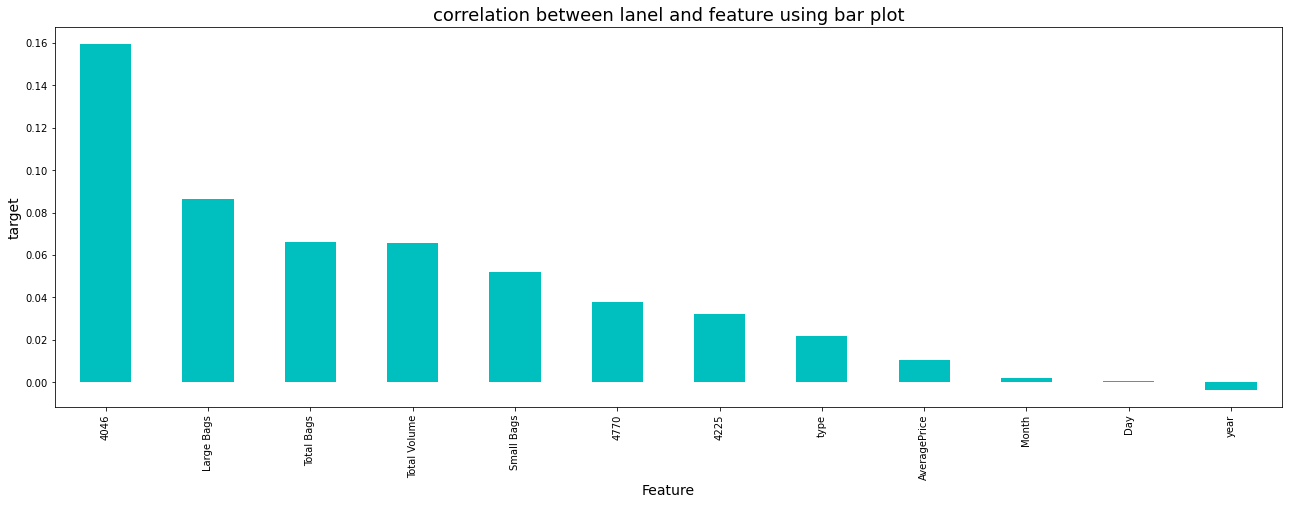

In [103]:
plt.figure(figsize=(22,7))
new_df1.corr()['region'].sort_values(ascending=False).drop(['region']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('target',fontsize=14)
plt.title('correlation between lanel and feature using bar plot',fontsize=18)
plt.show()


We can conclude that month, day and year column have very less corelation with target variable. so lets drop these columns.

In [105]:
# Dropping irrelevant columns
new_df1.drop("Month",axis=1, inplace=True)
new_df1.drop("Day",axis=1, inplace=True)
new_df1.drop("year",axis=1, inplace=True)


In [106]:
new_df1.head()

AveragePrice  Total Volume      4046      4225      4770  Total Bags  \
0          1.33     -0.065094 -0.649918  0.358278 -0.212550   -0.527445   
1          1.35     -0.137269 -0.770067  0.276355 -0.165117   -0.488205   
2          0.93      0.215503 -0.724508  0.656010  0.034215   -0.556204   
3          1.08      0.029840 -0.625017  0.475615 -0.110976   -0.702370   
4          1.28     -0.170456 -0.677083  0.268966 -0.100289   -0.675712   

   Small Bags  Large Bags  type  region  
0   -0.337064   -0.775214     0       0  
1   -0.301038   -0.765237     0       0  
2   -0.364044   -0.752534     0       0  
3   -0.500341   -0.693012     0       0  
4   -0.479918   -0.600755     0       0

Separating the features and label variables into x and y


In [108]:
x = new_df1.drop("region", axis=1)
y = new_df1["region"]


In [109]:
# Dimension of x
x.shape


(17782, 9)

In [110]:
# Dimension of y
y.shape


(17782,)

In [111]:
y.value_counts()


47    338
23    338
31    338
37    338
21    338
5     338
36    338
20    338
4     338
35    338
19    338
3     338
50    338
34    338
18    338
2     338
49    338
33    338
17    338
1     338
48    338
32    338
16    338
7     338
38    338
39    338
26    338
30    338
14    338
13    338
44    338
28    338
12    338
43    338
27    338
11    338
8     338
42    338
10    338
41    338
9     338
40    338
24    338
0     338
53    335
25    333
22    331
29    325
46    307
45    292
6     290
15    272
52    256
51    169
Name: region, dtype: int64

Here we can notice that the data is not balanced. Let's use oversampling method to balance the data.



# Oversampling the data


In [112]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)


In [113]:
y.value_counts()


47    338
19    338
6     338
53    338
37    338
21    338
5     338
52    338
36    338
20    338
4     338
51    338
35    338
3     338
31    338
50    338
34    338
18    338
2     338
49    338
33    338
17    338
1     338
48    338
32    338
16    338
22    338
38    338
7     338
23    338
15    338
46    338
30    338
14    338
45    338
29    338
13    338
44    338
28    338
12    338
43    338
27    338
11    338
42    338
26    338
10    338
41    338
25    338
9     338
40    338
24    338
8     338
39    338
0     338
Name: region, dtype: int64

<AxesSubplot:xlabel='region', ylabel='count'>

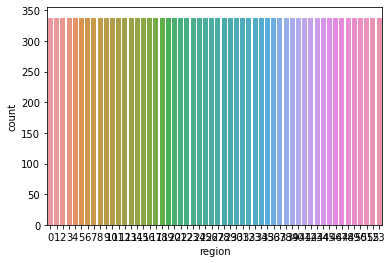

In [152]:
sns.countplot(y)


# Feature Scaling using Standard Scalarization


In [115]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

AveragePrice  Total Volume      4046      4225      4770  Total Bags  \
0         -0.214662     -0.090663 -0.670983  0.331542 -0.226500   -0.550791   
1         -0.164669     -0.162398 -0.790733  0.250098 -0.179175   -0.511996   
2         -1.214516      0.188224 -0.745325  0.627530  0.019700   -0.579225   
3         -0.839571      0.003693 -0.646165  0.448192 -0.125159   -0.723736   
4         -0.339643     -0.195383 -0.698058  0.242753 -0.114496   -0.697380   
...             ...           ...       ...       ...       ...         ...   
18247     -0.201574      0.544421  0.522761  0.414499  0.350104    0.779118   
18248      0.183296      0.432391  0.493169  0.240021 -0.091353    0.672289   
18249     -1.731862      1.126681  1.487272  0.615796  1.135593    0.795151   
18250     -1.738491      1.080485  1.387456  0.756733  1.185421    0.836379   
18251      0.620290     -0.899007 -0.481590 -0.694934 -1.071849   -0.768692   

       Small Bags  Large Bags      type  
0       -0.361099   -0.795401 -1.038205  
1       -0.325438   -0.785540 -1.038205  
2       -0.387806   -0.772984 -1.038205  
3       -0.522722   -0.714152 -1.038205  
4       -0.502506   -0.622963 -1.038205  
...           ...         ...       ...  
18247    0.072729    1.416031  0.963201  
18248    0.402436    1.168937  0.963201  
18249    0.861553    0.709050 -1.038205  
18250    0.818140    0.922806 -1.038205  
18251   -0.555094   -1.207356  0.963201  

[18252 rows x 9 columns]

# Checking VIF values


In [116]:
# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif


VIF values      Features
0    1.939575  AveragePrice
1   54.384031  Total Volume
2    6.854014          4046
3   12.212133          4225
4    3.768169          4770
5   35.554168    Total Bags
6   17.752208    Small Bags
7    3.552987    Large Bags
8    3.439829          type

In [117]:
# Dropping the feature Total Volume
x.drop("Total Volume",axis=1, inplace=True)


In [118]:
# Againing checking the VIF after removing one column

vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif


VIF values      Features
0    1.882454  AveragePrice
1    3.550697          4046
2    4.439540          4225
3    3.753596          4770
4   26.473691    Total Bags
5   17.742824    Small Bags
6    3.497886    Large Bags
7    3.346453          type

In [119]:
# Dropping the feature Total Volume
x.drop("Total Bags",axis=1, inplace=True)


In [120]:
# Checking VIF again
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif


VIF values      Features
0    1.781581  AveragePrice
1    3.549984          4046
2    4.247349          4225
3    3.749256          4770
4    3.561356    Small Bags
5    1.890828    Large Bags
6    3.333933          type

In [121]:
# DataFrame after preprocessing and data cleaning
x.head()


AveragePrice      4046      4225      4770  Small Bags  Large Bags  \
0     -0.214662 -0.670983  0.331542 -0.226500   -0.361099   -0.795401   
1     -0.164669 -0.790733  0.250098 -0.179175   -0.325438   -0.785540   
2     -1.214516 -0.745325  0.627530  0.019700   -0.387806   -0.772984   
3     -0.839571 -0.646165  0.448192 -0.125159   -0.522722   -0.714152   
4     -0.339643 -0.698058  0.242753 -0.114496   -0.502506   -0.622963   

       type  
0 -1.038205  
1 -1.038205  
2 -1.038205  
3 -1.038205  
4 -1.038205

# Finding best random state


In [124]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_train, y_train)
    pred = DTC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)


Best accuracy is  0.795836376917458  on Random_state  87


# Creating train_test split

In [128]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=87)


In [126]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score


# Decision Tree Classifier


In [129]:
# Checking Accuracy for Decision Tree Classifier
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)

#Prediction
predDTC = DTC.predict(x_test)

print(accuracy_score(y_test, predDTC))
print(confusion_matrix(y_test, predDTC))
print(classification_report(y_test,predDTC))


0.795836376917458
[[ 84   0   0 ...   0   0   0]
 [  0  75   0 ...   0   0   2]
 [  0   0  96 ...   0   0   1]
 ...
 [  0   0   0 ... 103   0   0]
 [  0   0   0 ...   0  97   0]
 [  0   1   0 ...   0   0  64]]
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        98
           1       0.79      0.74      0.76       102
           2       0.94      0.88      0.91       109
           3       0.82      0.78      0.80       113
           4       0.85      0.81      0.83       107
           5       0.71      0.75      0.73        97
           6       0.98      0.98      0.98       112
           7       0.82      0.79      0.80       109
           8       0.92      0.97      0.95       109
           9       0.74      0.77      0.75       113
          10       0.78      0.66      0.72       111
          11       0.86      0.86      0.86       111
          12       0.83      0.86      0.85        96
          13       0.71      0.76

Here we are getting 79.6% accuracy using Decision Tree Classifier.

In [133]:
# Checking accuracy for Random Forest Classifier
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)

# Prediction
predRFC = RFC.predict(x_test)

print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test,predRFC))


0.8924397370343317
[[ 91   0   0 ...   0   0   0]
 [  0  89   0 ...   0   0   0]
 [  0   0 108 ...   0   0   0]
 ...
 [  0   0   0 ... 103   0   0]
 [  0   0   0 ...   1 102   0]
 [  0   1   1 ...   0   0  68]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90        98
           1       0.88      0.87      0.88       102
           2       0.98      0.99      0.99       109
           3       0.90      0.84      0.87       113
           4       0.93      0.92      0.92       107
           5       0.85      0.81      0.83        97
           6       0.99      0.99      0.99       112
           7       0.93      0.87      0.90       109
           8       0.94      0.97      0.95       109
           9       0.87      0.83      0.85       113
          10       0.88      0.85      0.86       111
          11       0.93      0.93      0.93       111
          12       0.96      0.95      0.95        96
          13       0.80      0.9

The accuracy here is 89%

In [135]:
# Checking accuracy for Logistic Regression Classifier
LR = LogisticRegression()
LR.fit(x_train,y_train)

# Prediction
predLR = LR.predict(x_test)

print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test,predLR))


0.4600073046018992
[[ 56   0   0 ...   0   0   0]
 [  0  35   0 ...   0   0   0]
 [  0   0  59 ...   0   0  10]
 ...
 [  0   0   0 ... 103   0   0]
 [  0   0   0 ...   0  90   0]
 [  0   7   0 ...   0   0   8]]
              precision    recall  f1-score   support

           0       0.53      0.57      0.55        98
           1       0.21      0.34      0.26       102
           2       0.67      0.54      0.60       109
           3       0.44      0.31      0.36       113
           4       0.48      0.50      0.49       107
           5       0.52      0.40      0.45        97
           6       0.75      0.84      0.79       112
           7       0.49      0.48      0.48       109
           8       0.66      0.75      0.70       109
           9       0.45      0.62      0.52       113
          10       0.67      0.25      0.37       111
          11       0.41      0.38      0.39       111
          12       0.30      0.48      0.37        96
          13       0.09      0.0

The accuracy using Logistic regression is 46%

In [137]:
# Checking accuracy for Support Vector Machine Classifier
svc = SVC()
svc.fit(x_train,y_train)

# Prediction
predsvc = svc.predict(x_test)

print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test,predsvc))


0.7719138056975895
[[ 90   0   0 ...   0   0   0]
 [  0  54   0 ...   0   0   0]
 [  0   0  96 ...   0   0   0]
 ...
 [  0   0   0 ... 103   0   0]
 [  0   0   0 ...   1 101   0]
 [  0   0   1 ...   0   0  60]]
              precision    recall  f1-score   support

           0       0.74      0.92      0.82        98
           1       0.48      0.53      0.50       102
           2       0.96      0.88      0.92       109
           3       0.89      0.68      0.77       113
           4       0.82      0.77      0.79       107
           5       0.69      0.70      0.70        97
           6       0.98      0.98      0.98       112
           7       0.86      0.76      0.81       109
           8       0.96      0.96      0.96       109
           9       0.71      0.78      0.74       113
          10       0.73      0.65      0.69       111
          11       0.85      0.84      0.84       111
          12       0.87      0.97      0.92        96
          13       0.52      0.6

The accuracy here is 77%

In [138]:
# Checking accuracy for KNeighbors Classifier
knn = KNN()
knn.fit(x_train,y_train)

# Prediction
predknn = knn.predict(x_test)

print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test,predknn))


0.8480642804967129
[[ 88   0   0 ...   0   0   0]
 [  0  78   0 ...   0   0   0]
 [  0   0 107 ...   0   0   0]
 ...
 [  0   0   0 ... 103   0   0]
 [  0   0   0 ...   1 102   0]
 [  0   0   0 ...   0   0  63]]
              precision    recall  f1-score   support

           0       0.81      0.90      0.85        98
           1       0.76      0.76      0.76       102
           2       0.96      0.98      0.97       109
           3       0.88      0.78      0.83       113
           4       0.86      0.89      0.87       107
           5       0.78      0.82      0.80        97
           6       1.00      1.00      1.00       112
           7       0.90      0.90      0.90       109
           8       0.98      0.97      0.98       109
           9       0.75      0.81      0.77       113
          10       0.77      0.72      0.74       111
          11       0.86      0.94      0.90       111
          12       0.89      0.93      0.91        96
          13       0.72      0.7

The accuracy using KNN is 85%

# Gradient Boosting Classifier

In [139]:
# Checking accuracy for Gradient Boosting Classifier
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)

# Prediction
predGB = GB.predict(x_test)

print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test,predGB))


0.8104455807158509
[[ 82   0   0 ...   0   0   0]
 [  0  66   0 ...   0   0   3]
 [  0   0  96 ...   0   0   3]
 ...
 [  0   0   0 ... 103   0   0]
 [  0   0   0 ...   0 101   0]
 [  0   0   0 ...   0   0  64]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83        98
           1       0.69      0.65      0.67       102
           2       0.97      0.88      0.92       109
           3       0.85      0.72      0.78       113
           4       0.87      0.79      0.83       107
           5       0.77      0.77      0.77        97
           6       0.96      0.97      0.97       112
           7       0.87      0.79      0.83       109
           8       0.97      0.94      0.96       109
           9       0.81      0.73      0.77       113
          10       0.78      0.69      0.73       111
          11       0.86      0.86      0.86       111
          12       0.89      0.89      0.89        96
          13       0.71      0.8

The accuracy using Gradient boosting classifier is 81%

# AdaBoost Classifier

In [140]:
# Checking accuracy for AdaBoost Classifier
ABC = AdaBoostClassifier()
ABC.fit(x_train,y_train)

# Prediction
predABC = ABC.predict(x_test)

print(accuracy_score(y_test, predABC))
print(confusion_matrix(y_test, predABC))
print(classification_report(y_test,predABC))


0.048758217677136596
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        98
           1       0.00      0.00      0.00       102
           2       0.00      0.00      0.00       109
           3       0.00      0.00      0.00       113
           4       0.20      0.11      0.14       107
           5       0.00      0.00      0.00        97
           6       0.00      0.00      0.00       112
           7       0.00      0.00      0.00       109
           8       0.00      0.00      0.00       109
           9       0.00      0.00      0.00       113
          10       0.00      0.00      0.00       111
          11       0.00      0.00      0.00       111
          12       0.00      0.00      0.00        96
          13       0.00      0.00      0.00        92
          14       0.00      0.00      0.00     

The accuracy using Adaboost classifier is 48%

# Checking the Cross Validation Score


In [141]:
from sklearn.model_selection import cross_val_score


In [142]:
# cv score for Decision Tree Classifier
print(cross_val_score(DTC,x,y,cv=5).mean())


0.5783996878318194


In [143]:
# cv score for Random Forest Classifier
print(cross_val_score(RFC,x,y,cv=5).mean())


0.696574029258263


In [144]:
# cv score for Logistic Regression Classifier
print(cross_val_score(LR,x,y,cv=5).mean())


0.35979731580388935


In [145]:
# cv score for Support Vector  Classifier
print(cross_val_score(svc,x,y,cv=5).mean())


0.6428255572689786


In [146]:
# cv score for KNN Classifier
print(cross_val_score(knn,x,y,cv=5).mean())


0.6396474450610267


In [148]:
# cv score for AdaBoosting Classifier
print(cross_val_score(ABC,x,y,cv=5).mean())


0.06355666115119521


From the accuracy score and cross validation score i am choosing Random Forest Classifier as best model.

# Hyperparameter Tuning


In [153]:
from sklearn.model_selection import GridSearchCV


In [155]:
# Random forest classifier
rfc=RandomForestClassifier()
parameters={"n_estimators":[10,50,100,120,150],"max_features": ["auto", "sqrt", "log2"]}



In [157]:
GCV=GridSearchCV(rfc,parameters,cv=5)


In [159]:
GCV.fit(x_train,y_train)
print(GCV.best_params_)


{'max_features': 'auto', 'n_estimators': 150}


In [163]:
region = RandomForestClassifier(max_features='auto',n_estimators=150 )
region.fit(x_train, y_train)
pred = region.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)


89.554419284149


The accuracy of the best model increased after tuning and giving 89.55% accuracy.


# Saving the model


In [167]:
# Saving the model using .pkl
import joblib
joblib.dump(region,"Avacado_region.pkl")

['Avacado_region.pkl']

# Predicting the saved model


In [168]:
# Let's load the saved model and get the prediction

# Loading the saved model
model=joblib.load("Avacado_region.pkl")

#Prediction
prediction = model.predict(x_test)
prediction


array([49,  2,  5, ..., 48, 19, 22])

# These are the predicted region rate values.


In [169]:
finaldf=pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])
finaldf

0     1     2     3     4     5     6     7     8     9     ...  \
Predicted    49     2     5     7    22    18    38    48    45    12  ...   
Original     49     2     5     7    22    11    38    48    45    12  ...   

           5466  5467  5468  5469  5470  5471  5472  5473  5474  5475  
Predicted    29    19    52    31    46    26    39    48    19    22  
Original     29    19    52    48    46    26    39    48    19    22  

[2 rows x 5476 columns]

 we can see thar predicted and original values are same.

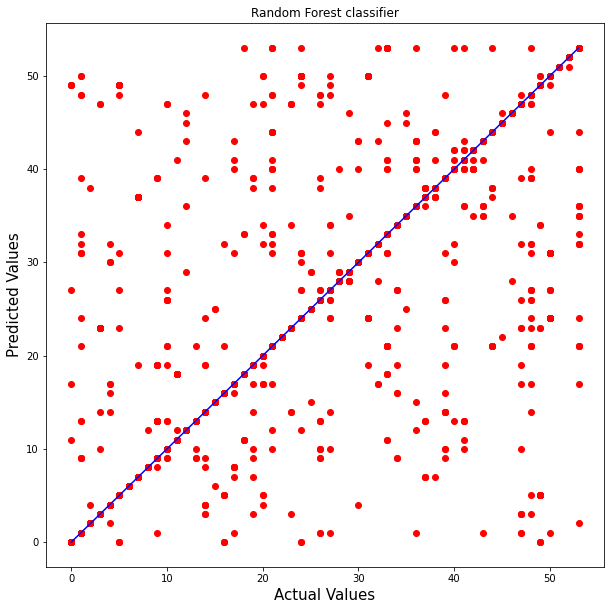

In [171]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, prediction, c='r')
plt1 = max(max(prediction), max(y_test))
plt2 = min(min(prediction), min(y_test))
plt.plot([plt1, plt2], [plt1, plt2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.title("Random Forest classifier")
plt.show()
